# Klausur Data Science I  
### Klausur I im Sommersemester 2025

## Allgemeine Informationen

* Sie haben eine Woche Zeit, um die Prüfung abzuschließen. 

* Sie können alle Quellen frei verwenden (einschließlich ChatGPT oder ähnlicher Software).

* Sie sollten die folgenden Pakete verwenden: `numpy, pandas, scipy, scikit-learn/sklearn, matplotlib, seaborn, statsmodels` und die nativen Bibliotheken von Python. Diese reichen aus, um die Prüfung zu lösen. Wenn Sie andere Bibliotheken verwenden, begründen Sie deren Verwendung.

* Der Code muss ausreichend kommentiert sein, um verständlich zu sein. Schreiben Sie Funktionen, wenn Sie Code wiederverwenden. Befolgen Sie im Allgemeinen die Richtlinien aus der Vorlesung. Bei schlecht strukturiertem oder unverständlichem Code können Punkte abgezogen werden.

* Begründen Sie Entscheidungen bezüglich der Wahl von Plots, Hypothesentests usw. immer schriftlich und interpretieren Sie Ihre Ergebnisse.

* Es ist **nicht** erlaubt, Hilfe oder Rat von anderen Personen in irgendeiner Form einzuholen. 

* Bitte reichen Sie das vollständige Repository als `.zip`-Datei mit dem Namen `Nachname_Matrikelnummer.zip` bis zum 4. August 2025 um 00:00 Uhr auf StudIP im Ordner `Submission - Exam 1` ein.

* Fügen Sie der ZIP-Datei außerdem die unterschriebene Eigenständigkeitserklärung (`Eigenständigkeitserklärung.pdf`) bei. 

* Bei Fragen wenden Sie sich bitte rechtzeitig über Matrix an uns.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal
from scipy.signal import periodogram
from scipy.stats import zscore, mannwhitneyu
import statsmodels.api as sm
from statsmodels.tsa.seasonal import STL
from statsmodels.stats.multitest import multipletests
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, StandardScaler, FunctionTransformer
from sklearn.ensemble import IsolationForest
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import plot_tree, export_text, DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

## Aufgaben und Punkte:

<table>
  <thead>
    <tr>
      <th colspan="4" style="border-right: 1px solid gray;">Aufgabe 1 - Data Preprocessing</th>
      <th colspan="5" style="border-right: 1px solid gray;">Aufgabe 2 - Plotting</th>
      <th colspan="3" style="border-right: 1px solid gray;">Aufgabe 3 - Statistics</th>
      <th colspan="2">Aufgabe 4 - Machine Learning </th>
    </tr>
    <tr style="border-bottom: 1px solid gray;">
      <th>Aufgabe 1.1</th>
      <th>Aufgabe 1.2</th>
      <th>Aufgabe 1.3</th>
      <th style="border-right: 1px solid gray;">Aufgabe 1.4</th>
      <th>Aufgabe 2.1</th>
      <th>Aufgabe 2.2</th>
      <th>Aufgabe 2.3</th>
      <th>Aufgabe 2.4</th>
      <th style="border-right: 1px solid gray;">Aufgabe 2.5</th>
      <th>Aufgabe 3.1</th>
      <th>Aufgabe 3.2</th>
      <th style="border-right: 1px solid gray;">Aufgabe 3.3</th>
      <th>Aufgabe 4.1</th>
      <th>Aufgabe 4.2</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>2 Punkte</td>
      <td>11 Punkte</td>
      <td>4 Punkte</td>
      <td style="border-right: 1px solid gray;">2 Punkte</td>
      <td>2 Punkte</td>
      <td>14 Punkte</td>
      <td>2 Punkte</td>
      <td>4 Punkte</td>
      <td style="border-right: 1px solid gray;">2 Punkte</td>
      <td>6 Punkte</td>
      <td>4 Punkte</td>
      <td style="border-right: 1px solid gray;">7 Punkte</td>
      <td>15 Punkte</td>
      <td>25 Punkte</td>
    </tr>
    <tr>
      <td colspan="4" style="text-align: center; font-weight: bold;border-right: 1px solid gray;">19 Punkte</td>
      <td colspan="5" style="text-align: center; font-weight: bold;border-right: 1px solid gray;">24 Punkte</td>
      <td colspan="3" style="text-align: center; font-weight: bold;border-right: 1px solid gray;">17 Punkte</td>
      <td colspan="2" style="text-align: center; font-weight: bold;">40 Punkte</td>
    </tr>
  </tbody>
</table>


_____
## Aufgabe 0: Setup

Der Prüfungsordner enthält eine `Dockerfile`-Datei, in der alle erforderlichen Bibliotheken definiert sind, sowie eine `docker-compose.yml`-Datei. Die Dockerfile-Datei basiert auf dem Jupyter Server-Image. Verwenden Sie sie, um ein Docker-Image zu erstellen und anschließend einen Container aus diesem Image zu starten. Sobald der Container ausgeführt wird, melden Sie sich bei der Jupyter Server-Instanz an, um die Prüfung abzuschließen.

Alternativ können Sie den [GWDG Jupyter Cloud-Dienst](https://jupyter-cloud.gwdg.de/) mit dem GWDG-Default-Image oder dem Data Science Jupyter-Image verwenden.

Wichtig:
Wenn Sie sich für die Arbeit in der Jupyter Cloud entscheiden und den Einsatz von weiteren Paketen entscheiden, müssen alle zusätzlichen Pakete innerhalb des Notebooks selbst installiert werden (z. B. mithilfe einer Zelle mit `!pip install ...`). Dadurch wird sichergestellt, dass Ihre Umgebung während der Benotung reproduziert werden kann.

Code, der nicht im bereitgestellten Docker-Container oder in der Jupyter Cloud-Umgebung ausgeführt werden kann, wird als **nicht funktionsfähig** angesehen und entsprechend benotet.

___
## Aufgabe 1: Data Preprocessing (18 Punkte)

### Datenbeschreibung

In dieser Prüfung arbeiten wir mit einem [Datensatz](https://arxiv.org/abs/2404.18984) von sozialen Interaktionen und nutzergenerierten Inhalten von [Bluesky](https://bsky.social/about). Der ursprüngliche Datensatz umfasst die vollständige Posting-Historie von über 4 Millionen Nutzern – etwa 81 % aller registrierten Konten – mit insgesamt 235 Millionen Posts. Um die Daten für die Analyse besser handhabbar zu machen, haben wir sie vorab aggregiert und in kleinere, strukturierte Dateien zusammengefasst.

Social-Media-Datensätze enthalten häufig einen Sentiment-Score, einen numerischen Wert, der den emotionalen Ton von Textinhalten wie Beiträgen angibt (0: negativ, 1: neutral, 2: positiv). Da Sentiment-Scores in diesem Datensatz nur für englischsprachige Inhalte verfügbar sind, haben wir die Daten so gefiltert, dass nur englischsprachige Beiträge enthalten sind. Darüber hinaus haben wir die Nutzerinteraktionen auf diejenigen beschränkt, die sich ausschließlich auf diese gefilterten Beiträge beziehen.

Unser aggregierter Datensatz besteht aus drei Unterdatensätzen: Autoreninteraktionen, Nutzerinteraktionen und Nutzer-Post-Statistiken pro Tag.

**Autoreninteraktionen**
Enthält aggregierte Statistiken darüber, wie oft Posts einzelner Autoren verschiedene Arten von Interaktionen erhalten haben. Jede Zeile entspricht einem eindeutigen Autor, der durch eine numerische Benutzer-ID identifiziert wird.
- `author`: Eine eindeutige Kennung für jeden Nutzer.
- `replied_count`: Die Gesamtzahl der Antworten, die auf Beiträge des Autors eingegangen sind.
- `reposted_count`: Die Gesamtzahl der Reposts von Beiträgen des Autors durch andere.
- `quoted_count`: Die Anzahl der Zitate von Beiträgen des Autors in Beiträgen anderer Nutzer.

**Nutzerinteraktionen**
Fasst das Interaktionsverhalten einzelner Benutzer zusammen – wie oft sie sich mit Beiträgen anderer beschäftigt haben. Jede Zeile steht für einen eindeutigen Benutzer, der durch eine numerische Benutzer-ID identifiziert wird.
- `user_id`: Eine eindeutige Kennung für jeden Benutzer.
- `replied_count`: Die Gesamtzahl der Antworten, die der Benutzer auf andere Beiträge geschrieben hat.
- `reposted_count`: Die Gesamtzahl der Beiträge, die der Benutzer erneut gepostet hat.
- `quoted_count`: Die Anzahl der Male, die der Benutzer Beiträge anderer Benutzer in seinen eigenen Beiträgen zitiert hat.

**Nutzer-Post-Statistiken pro Tag**
Liefert tägliche Statistiken zu benutzergenerierten Beiträgen. Jede Zeile steht für die Beitragstätigkeit eines einzelnen Benutzers an einem bestimmten Tag.
- `date`: Das Kalenderdatum, an dem die Beiträge verfasst wurden.
- `user_id`: Eine eindeutige Kennung für den Benutzer, der die Beiträge verfasst hat.
- `post_count`: Die Anzahl der Beiträge, die der Benutzer an diesem Tag verfasst hat.
- `mean_sentiment`: Der durchschnittliche Sentiment-Wert der Beiträge des Benutzers an diesem Tag, der den allgemeinen emotionalen Ton angibt (z. B. positiv, neutral oder negativ).

### Aufgabe 1.1. – Laden von Daten (2 Punkte)

Laden Sie die folgenden Datensätze in Pandas-Datenrahmen:
- `author_interaction_stats.csv.gz`
- `user_interaction_stats.csv.gz`
- `user_post_stats_per_day.csv.gz`

Stellen Sie sicher, dass die Spalte `date` in `user_post_stats_per_day` als Datum interpretiert wird – entweder während des Ladens oder durch anschließende Konvertierung.

In [2]:
# 1. Autor Interaktionen
df_author = pd.read_csv("author_interaction_stats.csv.gz")

# 2. Nutzer Interaktionen
df_user = pd.read_csv("user_interaction_stats.csv.gz")

#3. Nutzer Post Statistiken pro Tag (mit Datumskonvertierung)
df_daily_user = pd.read_csv("user_post_stats_per_day.csv.gz", parse_dates=["date"])

In [3]:
#prüfen ob alles korrekt geladen wurde
#Vorschau anzeigen (alles wäre deutlich zu viel)
print(df_author.head())
print(df_user.head())
print(df_daily_user.head())

#Datentyp vom Datum prüfen
print(df_daily_user.dtypes)

   author  replied_count  reposted_count  quoted_count
0   15109         195860            9397           873
1    1248         135219          116304         70391
2   90949         107807            2102          5816
3    4983          97109           71683         23029
4   34218          94790          105574         59459
   user_id  replied_count  reposted_count  quoted_count
0        0             76            1398           306
1        1             94              81            18
2        2           3674             557           444
3        4            188              12            10
4        5           1819            8587          2362
        date  user_id  post_count  mean_sentiment
0 2023-06-28       31           2        2.000000
1 2023-06-28       38           3        1.090989
2 2023-06-28       45           1        1.000000
3 2023-06-28       47           2        1.000000
4 2023-06-28       72           1        1.000000
date              datetime64[ns]
u

### Aufgabe 1.2. – Aggregation (11 Punkte)

Zunächst interessieren wir uns für Trends über die Zeit. Aggregieren Sie dazu die Daten aus `user_post_stats_per_day` über alle Tage und geben Sie zusammenfassende Statistiken für jeden Tag an.
 - Gesamtanzahl der Posts pro Tag
 - Durchschnittliches Sentiment über alle Nutzer pro Tag
 - Durchschnittliches Sentiment über alle Posts pro Tag (Tipp: Verwenden Sie hierfür einen gewichteten Mittelwert)

Stellen Sie sicher, dass der resultierende DataFrame nach der Spalte `date` indiziert ist, wobei diese als korrektes `datetime`-Objekt gespeichert ist.

In [4]:
#1. Gesamtanzahl der Posts pro Tag
total_posts_per_day = df_daily_user.groupby("date")["post_count"].sum()

#2. Durchschnitt. Sentiment über alle Nutzer pro Tag
mean_sentiment_per_user_per_day = df_daily_user.groupby("date")["mean_sentiment"].mean()

#3. Durchschnittliches Sentiment über alle Posts pro Tag
#zuerst gewichtetes Sentiment berechnen
df_daily_user["weighted_sentiment"] = df_daily_user["mean_sentiment"] * df_daily_user["post_count"]

#Dann gruppieren und aufsummieren
weighted_stats = df_daily_user.groupby("date").agg(
    total_weighted_sentiment=("weighted_sentiment", "sum"),
    total_posts=("post_count","sum")
)

#Gewichtetes Mittel berechnen
weighted_stats["mean_sentiment_per_post"] = (
    weighted_stats["total_weighted_sentiment"] / weighted_stats["total_posts"]
)

#4. Alles in einem DataFrame kombinieren
#Endgültiger DataFrame
df_summary = pd.DataFrame({
    "total_posts": total_posts_per_day,
    "mean_sentiment_per_user": mean_sentiment_per_user_per_day,
    "mean_sentiment_per_post": weighted_stats["mean_sentiment_per_post"]
})

#Stelle sicher, dass 'date' der Index ist und korrekt formatiert
df_summary.index = pd.to_datetime(df_summary.index)
df_summary.sort_index(inplace=True)

In [5]:
#Ergebnis überprüfen
print(df_summary.head())
print(df_summary.index.dtype)

            total_posts  mean_sentiment_per_user  mean_sentiment_per_post
date                                                                     
2023-06-28        12230                 1.053866                 1.077419
2023-06-29        72447                 0.953651                 1.000038
2023-06-30        95774                 0.968473                 0.999022
2023-07-01       212055                 1.011609                 0.989611
2023-07-02       310227                 1.009279                 1.008060
datetime64[ns]


Überprüfen Sie, ob alle Tage im betrachteten Zeitraum vorhanden sind oder ob ein Tag ausgelassen wurde.

In [6]:
#Datumsbereich des Dataframes
min_date = df_daily_user["date"].min()
max_date = df_daily_user["date"].max()

#Liste aller Tage erzeugen
all_days = pd.date_range(start=min_date, end=max_date, freq="D")

#Tatsächlich vorhandene Tage extrahieren
actual_days = pd.to_datetime(df_daily_user["date"].unique())

#Fehlende Tage ermitteln
missing_days = all_days.difference(actual_days)

In [48]:
#Ausgabe prüfen
print(f"Zeitraum: {min_date.date()} bis {max_date.date()}")
print(f"Anzahl erwarteter Tage: {len(all_days)}")
print(f"Anzahl vorhandener Tage: {len(actual_days)}")
print(f"Fehlende Tage: {missing_days}")

Zeitraum: 2023-06-28 bis 2024-03-18
Anzahl erwarteter Tage: 265
Anzahl vorhandener Tage: 265
Fehlende Tage: DatetimeIndex([], dtype='datetime64[ns]', freq='D')


Zusätzlich möchten wir möglicherweise einzelne Nutzer betrachten. Aggregieren Sie den Datensatz `user_post_stats_per_day` über alle Tage, um zusammenfassende Statistiken für jeden Nutzer zu berechnen. Nennen Sie den resultierenden DataFrame `user_stats` (das erleichtert spätere Verweise). Berücksichtigen Sie dabei folgende Features:
 - durchschnittliches Sentiment (Tipp: verwenden Sie einen gewichteten Mittelwert)
 - Standardabweichung des Sentiments (ohne Gewichtung)
 - Gesamtanzahl der Posts
 - durchschnittliche Anzahl an Posts pro Tag
 - Anzahl der aktiven Tage
 - Datum des ersten Posts
 - Datum des letzten Posts

Berechnen Sie außerdem das zeitliche Posting-Verhalten mit einer eigenen Funktion (Hinweis: dies kann länger dauern):
- durchschnittliche Anzahl an Tagen zwischen Posts
- Median der Tage zwischen Posts
- Standardabweichung der Zeit zwischen Posts
- relative Standardabweichung bzw. „Variationskoeffizient (CV)“ der Zeit zwischen Posts (definiert als Standardabweichung geteilt durch den Mittelwert)

Der Variationskoeffizient (CV) liefert ein normiertes Maß für die Regelmäßigkeit des Posting-Verhaltens. Ein niedriger CV weist auf konsistente Posting-Intervalle hin, während ein hoher CV auf unregelmäßiges oder schubweises Verhalten hindeutet. Im Gegensatz zur reinen Standardabweichung berücksichtigt der CV die durchschnittliche Posting-Frequenz des Nutzers und ermöglicht so einen sinnvolleren Vergleich zwischen verschiedenen Nutzern.

Beispiel: Ein Nutzer, der im Schnitt alle 2 Tage postet und eine Standardabweichung von 5 Tagen hat, hat einen CV von 2,5 – das deutet auf eine hohe Variabilität hin. Ein anderer Nutzer, der im Schnitt alle 20 Tage postet, aber die gleiche Standardabweichung aufweist, hat einen CV von 0,25 – das spricht für ein relativ regelmäßiges Verhalten.

In [8]:
#gewichtetes Sentiment
weighted_sentiment = (
    df_daily_user
    .assign(weighted_sentiment=lambda df: df["mean_sentiment"]*df["post_count"])
    .groupby("user_id")
    .agg(total_sentiment=("weighted_sentiment", "sum"),
        total_posts=("post_count", "sum"))
    .assign(mean_sentiment=lambda df: df["total_sentiment"]/df["total_posts"])
    [["mean_sentiment", "total_posts"]]
)

#Ungewichtete Standardabweichung des Sentiments
std_sentiment = df_daily_user.groupby("user_id")["mean_sentiment"].std().rename("std_sentiment")

#Anzahl aktiver Tage, durchschnittliche Posts pro Tag, erste/letzte Aktivität
user_timeline = (
    df_daily_user
    .groupby("user_id")
    .agg(
        mean_posts_per_day=("post_count", "mean"),
        active_days=("date", "nunique"),
        first_post=("date", "min"),
        last_post=("date","max")
    )
)

#Posting Intervalle pro Nutzer
def compute_posting_intervals(df):
    intervals = df.sort_values("date").groupby("user_id")["date"].apply(lambda x: x.diff().dt.days.dropna())
    interval_stats = intervals.groupby("user_id").agg(
        mean_days_between_posts="mean",
        median_days_between_posts="median",
        std_days_between_posts="std"
    )
    interval_stats["cv_days_between_posts"] = interval_stats["std_days_between_posts"]/ interval_stats["mean_days_between_posts"]
    return interval_stats

interval_stats = compute_posting_intervals(df_daily_user)

#Alles zusammenführen
user_stats = (
    weighted_sentiment
    .join(std_sentiment)
    .join(user_timeline)
    .join(interval_stats)
    .reset_index()
)

user_stats.head()

,user_id,mean_sentiment,total_posts,std_sentiment,mean_posts_per_day,active_days,first_post,last_post,mean_days_between_posts,median_days_between_posts,std_days_between_posts,cv_days_between_posts
0,0,0.406316,1404,0.235153,11.414634,123,2023-10-18,2024-03-18,1.245902,1.0,2.626349,2.107991
1,1,0.898177,512,0.507907,3.390728,151,2023-07-02,2024-03-18,1.733333,1.0,4.669861,2.694151
2,2,1.208864,5727,0.379932,29.520619,194,2023-07-28,2024-03-18,1.212435,1.0,0.751007,0.619420
3,3,1.217184,10,0.644854,1.250000,8,2024-02-21,2024-03-04,1.714286,1.0,1.112697,0.649073
4,4,1.514687,290,0.522817,2.685185,108,2023-08-20,2024-03-18,1.971963,1.0,1.390384,0.705076


Statt mit zwei einzelnen Spalten für das Datum des ersten und letzten Posts zu arbeiten, möchten wir die Information über die gesamte Zeitspanne zwischen diesen beiden Zeitpunkten nutzen. Berechne die Anzahl der Tage zwischen dem ersten und dem letzten Post und füge diese als neue Spalte hinzu. Lösche anschließend die beiden Datums-Spalten.

In [9]:
#Berechnen der Zeitspanne in tagen
user_stats["posting_span_days"] = (user_stats["last_post"] - user_stats["first_post"]).dt.days

#Löschen der beiden Datums Spalten
user_stats = user_stats.drop(columns=["first_post", "last_post"])

#Kontrolle
user_stats.head()

,user_id,mean_sentiment,total_posts,std_sentiment,mean_posts_per_day,active_days,mean_days_between_posts,median_days_between_posts,std_days_between_posts,cv_days_between_posts,posting_span_days
0,0,0.406316,1404,0.235153,11.414634,123,1.245902,1.0,2.626349,2.107991,152
1,1,0.898177,512,0.507907,3.390728,151,1.733333,1.0,4.669861,2.694151,260
2,2,1.208864,5727,0.379932,29.520619,194,1.212435,1.0,0.751007,0.619420,234
3,3,1.217184,10,0.644854,1.250000,8,1.714286,1.0,1.112697,0.649073,12
4,4,1.514687,290,0.522817,2.685185,108,1.971963,1.0,1.390384,0.705076,211


### Aufgabe 1.3. – Mergen (4 Punkte)

Führen Sie den Nutzer-Datensatz `user_stats` mit den Interaktionsdaten aus `user_interaction_stats` und `author_interaction_stats` zusammen. Gehen Sie dabei in zwei Schritten vor:
1. Führen Sie einen Left-Join von `user_stats` mit `user_interaction_stats` durch.
2. Mergen Sie den resultierenden Datensatz anschließend mit `author_interaction_stats`, ebenfalls per Left-Join.

Dieses Vorgehen stellt sicher, dass nur Nutzer berücksichtigt werden, die mindestens einen englischsprachigen Post verfasst haben (also in `user_stats` enthalten sind).

Beachten Sie, dass sowohl `user_interaction_stats` als auch `author_interaction_stats` Spalten für die Gesamtzahl an Replies, Reposts und Quotes enthalten. Um Verwechslungen zu vermeiden, hängen Sie an die Spalten aus `author_interaction_stats` den Suffix `_by_others` an, da diese die von anderen erhaltenen Interaktionen widerspiegeln (d.h. wie andere auf die Posts des Nutzers reagiert haben). So wird klar, ob der Nutzer der Akteur (Interaktion ausgeführt) oder das Ziel (Interaktion erhalten) war.

In [10]:
#ich habe oben das nicht als df_author_interactions_stats benannt sondern nur df_author, kann ich nachher noch ändern
df_author_interactions = df_author
#das gleiche mit df_user
df_user_interactions = df_user

#bennenen replies, reposts und quotes aus author_interaction_stats mit dem Suffix _by:others um die von user_interaction stats unterscheiden zu können
df_author_interactions_renamed = df_author_interactions.rename(columns={
    "author": "user_id",
    "replied_count": "replied_count_by_others",
    "reposted_count": "reposted_count_by_others",
    "quoted_count": "quoted_count_by_others"
})

#1 Left-join von user_stats mit user_interaction_stats
merged = user_stats.merge(df_user_interactions, on="user_id", how="left")

#2 mergen mit author_interactions_stats per left-join
merged = merged.merge(df_author_interactions_renamed, on="user_id", how="left")

#Ergebnis anzeigen
merged.head()

,user_id,mean_sentiment,total_posts,std_sentiment,mean_posts_per_day,active_days,mean_days_between_posts,median_days_between_posts,std_days_between_posts,cv_days_between_posts,posting_span_days,replied_count,reposted_count,quoted_count,replied_count_by_others,reposted_count_by_others,quoted_count_by_others
0,0,0.406316,1404,0.235153,11.414634,123,1.245902,1.0,2.626349,2.107991,152,76.0,1398.0,306.0,8.0,4.0,0.0
1,1,0.898177,512,0.507907,3.390728,151,1.733333,1.0,4.669861,2.694151,260,94.0,81.0,18.0,313.0,505.0,160.0
2,2,1.208864,5727,0.379932,29.520619,194,1.212435,1.0,0.751007,0.619420,234,3674.0,557.0,444.0,3659.0,936.0,168.0
3,3,1.217184,10,0.644854,1.250000,8,1.714286,1.0,1.112697,0.649073,12,NaN,NaN,NaN,89.0,340.0,79.0
4,4,1.514687,290,0.522817,2.685185,108,1.971963,1.0,1.390384,0.705076,211,188.0,12.0,10.0,1788.0,17091.0,2463.0


Einige Nutzer im Datensatz haben fehlende Werte in ihren Engagement-bezogenen Spalten. Diese Spalten umfassen sowohl ausgehende als auch eingehende Interaktionen: `"replied_count", "reposted_count", "quoted_count", "replied_count_by_others", "reposted_count_by_others", "quoted_count_by_others"`.

Ersetzen Sie alle fehlenden Werte (NaN) in diesen Spalten durch 0.

In [11]:
interaction_cols = [
    "replied_count",
    "reposted_count",
    "quoted_count",
    "replied_count_by_others",
    "reposted_count_by_others",
    "quoted_count_by_others"
]

merged[interaction_cols] = merged[interaction_cols].fillna(0)

#prüfen
merged[interaction_cols].isnull().sum()

replied_count               0
reposted_count              0
quoted_count                0
replied_count_by_others     0
reposted_count_by_others    0
quoted_count_by_others      0
dtype: int64

#### Aufgabe 1.4. – Dataframes speichern (2 Punkte)

Da die Transformation einige Zeit in Anspruch genommen hat, möchten wir die Ergebnisse sichern, falls der Kernel geschlossen wird. Speichern Sie beide aggregierten Dataframes als .csv-Dateien in der ersten Zelle und laden Sie sie in der zweiten Zelle wieder. Falls Ihr Notebook abstürzt, können Sie so an dieser Stelle weitermachen.

In [12]:
user_stats.to_csv("user_stats.csv", index=False)
merged.to_csv("user_stats_merged.csv", index=False)

In [13]:
user_stats = pd.read_csv("user_stats.csv")
merged = pd.read_csv("user_stats_merged.csv")

___
## Aufgabe 2: Plotting (24 Punkte)

### Aufgabe 2.1. – Beiträge pro Tag (2 Punkte)

Stellen Sie grafisch dar, wie viele Beiträge insgesamt täglich auf Bluesky veröffentlicht wurden.

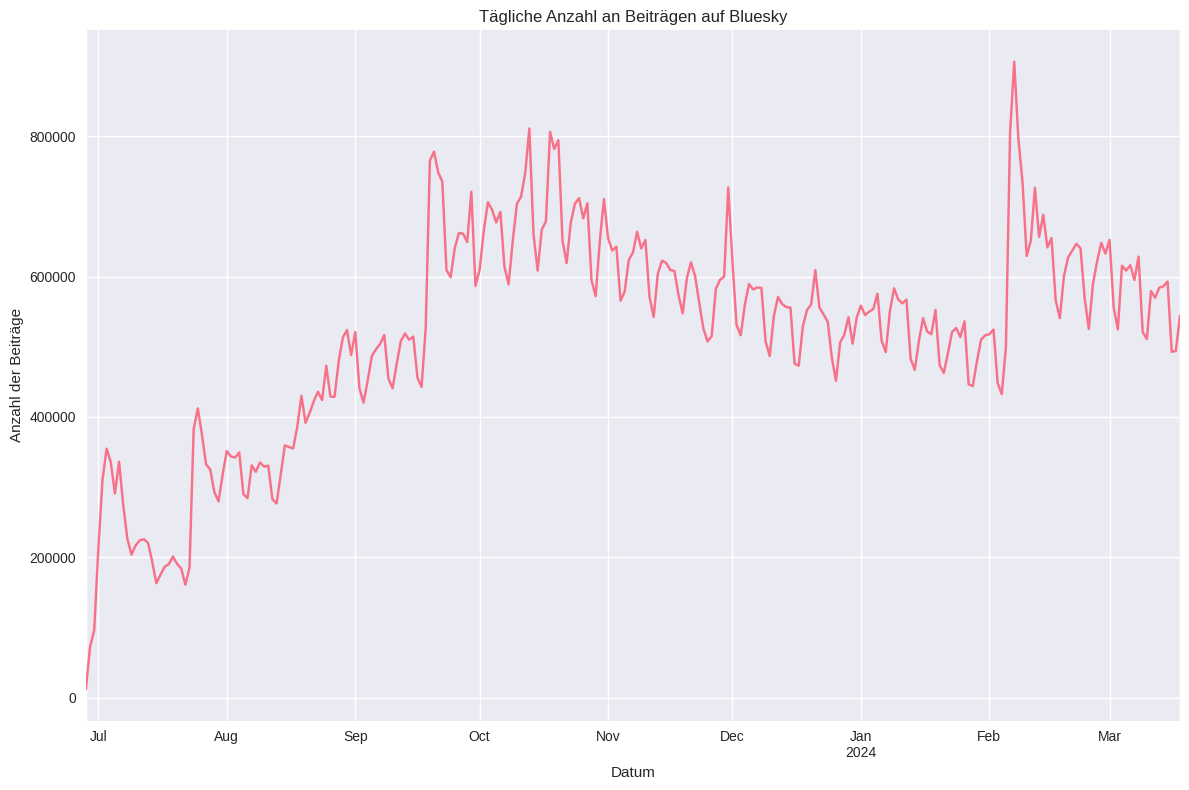

In [49]:
# ich benutze ein Liniendiagramm. Bei dem sieht man die Schwankungen zwischen den einzelnen wochentagen, aber die beschriftung überlappt nicht wie bei einem Balkendiagramm
total_posts_per_day.plot()

plt.title("Tägliche Anzahl an Beiträgen auf Bluesky")
plt.xlabel("Datum")
plt.ylabel("Anzahl der Beiträge")
plt.grid(True)
plt.tight_layout()
plt.show()

Es sieht so aus, als gäbe es ein periodisches Muster in den Daten. Lassen Sie uns herausfinden, was es ist.

### Aufgabe 2.2. – *Weekend whispers* (14 Punkte)

Zeitreihendaten über einen längeren Zeitraum (wie unsere täglichen Beiträge pro Tag auf Bluesky, die wir gerade geplottet haben) verhalten sich oft aufgrund verschiedener Komponenten so, wie sie es tun: einem allgemeinen Trend (nimmt die Posting-Aktivität zu oder ab?), einer Saisonalität (gibt es ein wiederkehrendes Muster?) und Residuen (gab es unerwartete Ereignisse?).

Eine Möglichkeit, diese Komponenten zu entflechten, ist die Season-Trend-Dekomposition mittels LOESS (STL).

STL ist ein leistungsfähiges Werkzeug, um im Detail zu verstehen, was die tägliche Posting-Aktivität auf Bluesky antreibt. Um STL jedoch auf unseren Datensatz anzuwenden, müssen wir angeben, welche Art von periodischem Muster oder Saisonalität wir erwarten. Anstatt zu raten, können wir unsere Daten betrachten und versuchen, ein periodisches Muster zu finden, das wir dann STL übergeben können. Überlegen Sie aber auch gerne, welche Saisonalitäten man in Daten wie unseren erwarten könnte.

#### Aufgabe 2.2.1. – Frequenzspektrum (6 Punkte)

Untersuchen Sie, ob die Anzahl der täglichen Beiträge einem periodischen Muster folgt (d. h., ob bestimmte Verhaltensweisen beim Posten sich im Laufe der Zeit regelmäßig wiederholen). Verwenden Sie dazu die Funktion `periodogram` aus `scipy.signal`, die die Power Spectral Density (PSD) der Zeitreihe schätzt. Eine PSD zeigt, wie viel der Gesamtvarianz („Power”) in der Zeitreihe mit verschiedenen Frequenzen zusammenhängt. Obwohl die Funktion Frequenzen ausgibt (wie oft etwas in Zyklen pro Tag auftritt), interessieren uns in der Regel eher Perioden (Länge eines vollständigen Zyklus in Tagen), da wir nach Mustern suchen, die sich alle X Tage wiederholen (Hinweis: Frequenz = 1 / Periode). Bei der Verwendung der Funktion `periodogram` interessieren uns vor allem die periodischen Komponenten der Zeitreihe. Sie können Trends oder nicht-periodische Komponenten mit dem integrierten Detrending-Argument berücksichtigen.

Zeichnen Sie die Leistung (y-Achse) für jede Anzahl von Tagen bis einschließlich 10 (x-Achse) auf. Was ist laut Ihrer Grafik die Hauptfrequenz in den Daten? Markieren Sie die maximale Power Ihrer Grafik mit einer andersfarbigen vertikalen Linie.

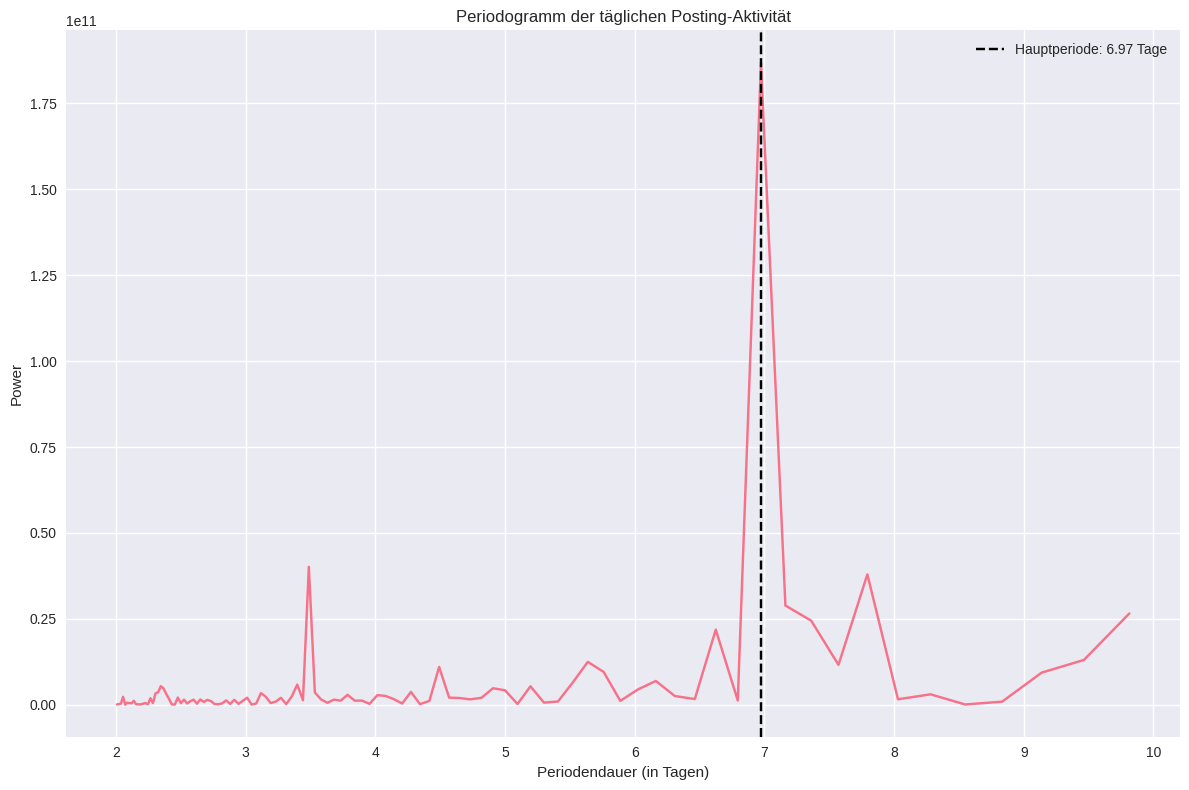

In [15]:
post_counts = total_posts_per_day.values

#Frequenzanalyse (Detrending entfernt linearen Trend, wichtig!)
freqs, power = periodogram(post_counts, detrend='linear')

#Frequenz in Tage umrechnen (Periode = 1/Frequenz)
periods = 1 / freqs

#Nur Perioden <= 10 Tage (also hohe Frequenz, z.B. wöchentliche Muster)
mask = periods <= 10

#Visualisierung
plt.plot(periods[mask], power[mask])
plt.xlabel("Periodendauer (in Tagen)")
plt.ylabel("Power")
plt.title("Periodogramm der täglichen Posting-Aktivität")

#Hauptperiode markieren
max_idx = np.argmax(power[mask])
plt.axvline(x=periods[mask][max_idx], color='black', linestyle='--', label=f'Hauptperiode: {periods[mask][max_idx]:.2f} Tage')
plt.legend()
plt.tight_layout()
plt.show()

#### Aufgabe 2.2.2. – Saisonale Zerlegung (5 Punkte)

Nachdem Sie nun den Zeitraum festgelegt haben, den Sie untersuchen möchten, zerlegen Sie die Zeitreihe mit der Funktion `statsmodels.tsa.seasonal.STL`, um das saisonale Muster vom Gesamttrend und unerwarteten Ausschlägen oder Einbrüchen (Residuen) zu trennen. Verwenden Sie das Argument `robust=True`, um den Einfluss plötzlicher Sprünge in den Zeitreihendaten zu verringern. Zeichnen Sie die ursprüngliche Zeitreihe sowie die Komponenten `trend`, `seasonal` und `residual` auf und extrahieren Sie die saisonale Zeitreihe.

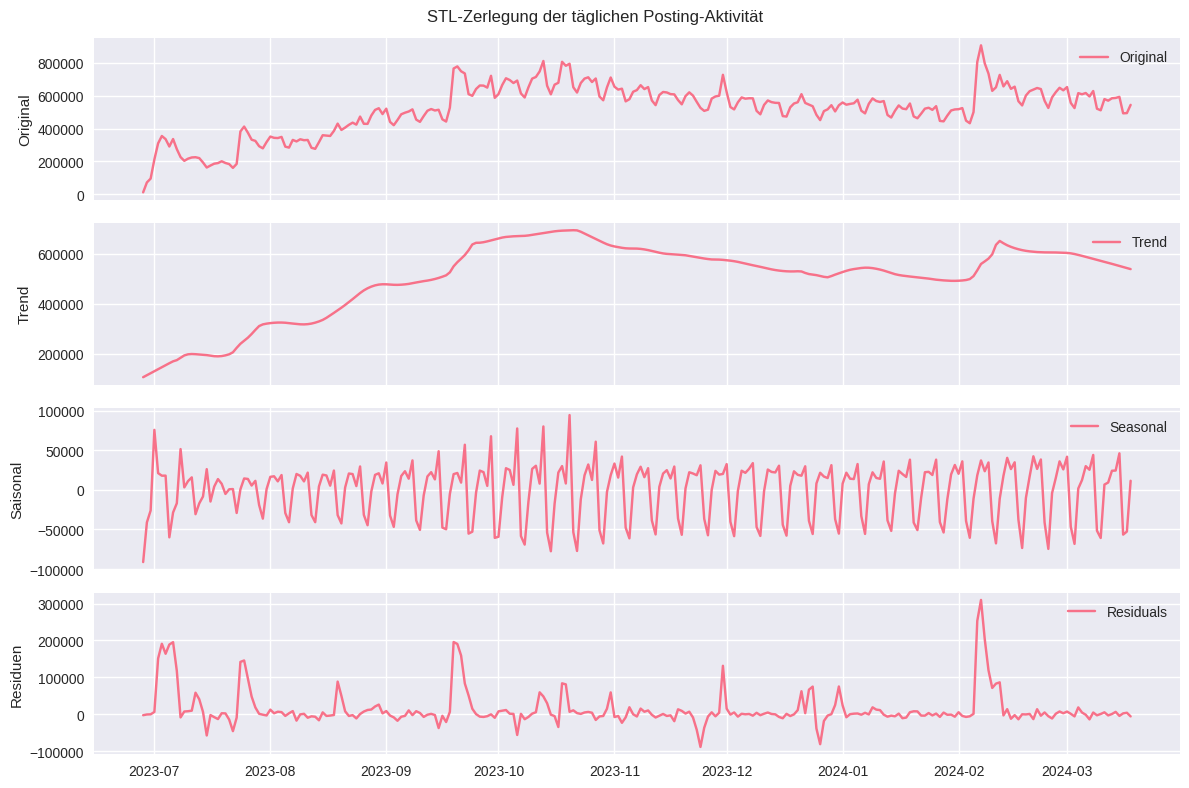

In [16]:
stl = STL(total_posts_per_day, period=7, robust=True)
result = stl.fit()

#einzelne Komponenten
trend = result.trend
seasonal = result.seasonal
resid = result.resid

#Visualisierung
fig, axes = plt.subplots(4,1, sharex=True)

#Zeitreihe + Komponenten plotten
axes[0].plot(total_posts_per_day, label="Original")
axes[0].set_ylabel("Original")
axes[0].legend()

axes[1].plot(trend, label="Trend")
axes[1].set_ylabel("Trend")
axes[1].legend()

axes[2].plot(seasonal, label="Seasonal")
axes[2].set_ylabel("Saisonal")
axes[2].legend()

axes[3].plot(resid, label="Residuals")
axes[3].set_ylabel("Residuen")
axes[3].legend()

plt.suptitle("STL-Zerlegung der täglichen Posting-Aktivität")
plt.tight_layout()
plt.show()

Es lässt sich ein deutliches wöchentliches saisonales Muster beobachten.

Die saisonale Zerlegung zeigt außerdem einen deutlichen Anstieg im Februar 2024, der sowohl im Trend als auch in den Residuen sichtbar ist. Wie lässt sich der Anstieg der Aktivität in diesem Zeitraum erklären?

Geben Sie anhand Ihrer Darstellung des STL-Trends eine Erklärung/Interpretation zur allgemeinen Entwicklung der Posting-Aktivität auf Bluesky ab.

Interpretation der allgemeinen Entwicklung der Posting-Aktivität auf Bluesky:
Die saisonale Zerlegung zeigt eine klare wöchentliche Struktur im posting Verhalten.
Der Trend zeigt zunächst eine wachsende Plattformaktivität, die sich gegen Jahresende 2023 stabilisiert.
Der Anstieg im Februar 2024, der sowohl im Trend als auch in den Residuen sichtbar ist korreliert zeitlich exakt mit dem öffentlichen Launch von Bluesky am 06.02.2024. Zuvor war Bluesky invite-only.

#### Aufgabe 2.2.3. – Wochentagseffekt (3 Punkte)

Fügen Sie der Zeitreihe, die in der Eigenschaft `seasonal` der STL-Zerlegung enthalten ist, basierend auf dem Datums-/Zeitindex eine Spalte `day_of_week` hinzu. Stellen Sie den durchschnittlichen saisonalen Effekt für jeden Wochentag als Balkendiagramm dar. An welchen Tagen sind die Nutzer am aktivsten und an welchen Tagen am wenigsten aktiv?

In [17]:
#Funktion damit ich das nicht jedes mal wenn ich mit Wochentagen arbeite nochmal machen muss
def prepare_wochentag(df, index_col=None, value_col=None):
    weekday_map = {
        "Monday": "Montag",
        "Tuesday": "Dienstag",
        "Wednesday": "Mittwoch",
        "Thursday": "Donnerstag",
        "Friday": "Freitag",
        "Saturday": "Samstag",
        "Sunday": "Sonntag"
    }
    weekday_order = ["Montag", "Dienstag", "Mittwoch", "Donnerstag", "Freitag", "Samstag", "Sonntag"]

    if index_col is not None:
        df = df.copy()
        df["wochentag"] = df[index_col].dt.day_name().map(weekday_map)
    else:
        df = df.copy()
        df["wochentag"] = df.index.day_name().map(weekday_map)

    if value_col is not None:
        grouped = df.groupby("wochentag")[value_col].mean().reindex(weekday_order)
        return grouped
    return df, weekday_order

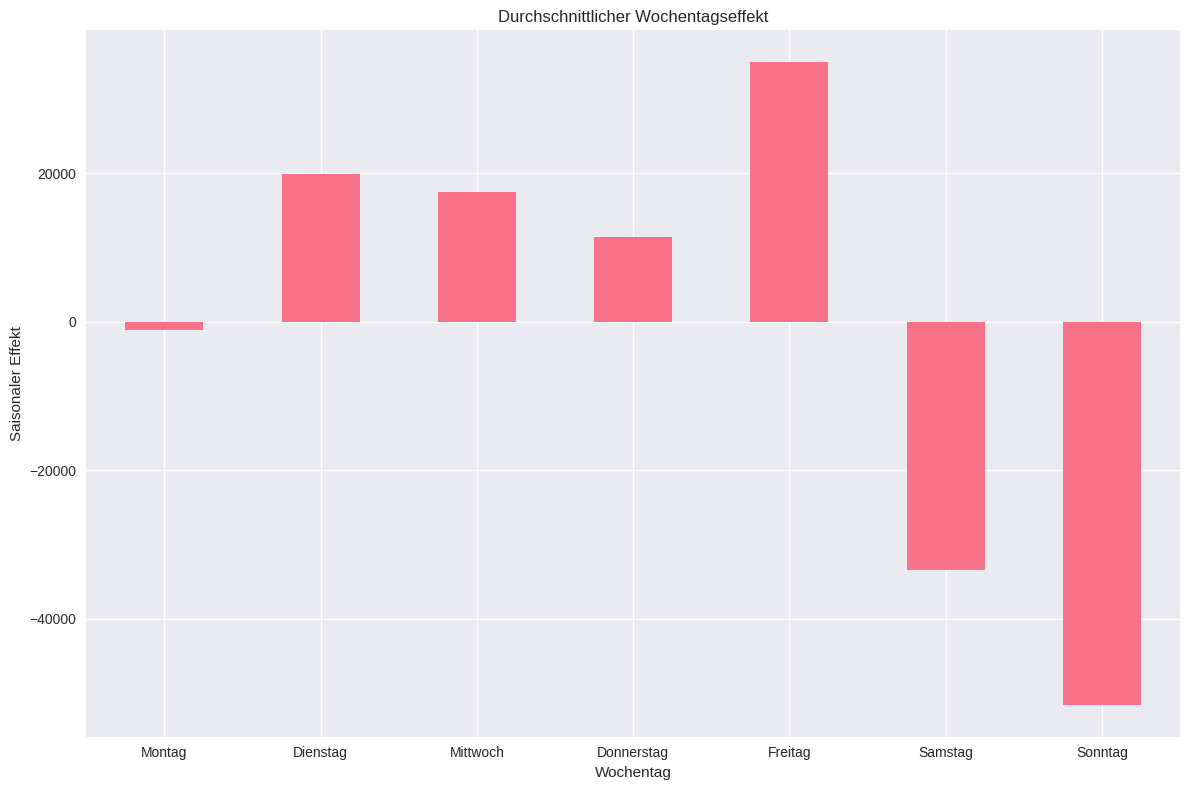

In [18]:
#Plot
df_seasonal = pd.DataFrame({"seasonal": seasonal}, index=total_posts_per_day.index)

weekday_effect = prepare_wochentag(df_seasonal, value_col="seasonal")

weekday_effect.plot(kind="bar")
plt.title("Durchschnittlicher Wochentagseffekt")
plt.xlabel("Wochentag")
plt.ylabel("Saisonaler Effekt")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Aufgabe 2.3. – Stimmungsdaten (2 Punkte)

Zeichnen Sie die Nutzerstimmung und die durchschnittliche Post-Stimmung im Zeitverlauf auf und berechnen Sie die Korrelation zwischen den beiden Zeitreihen.

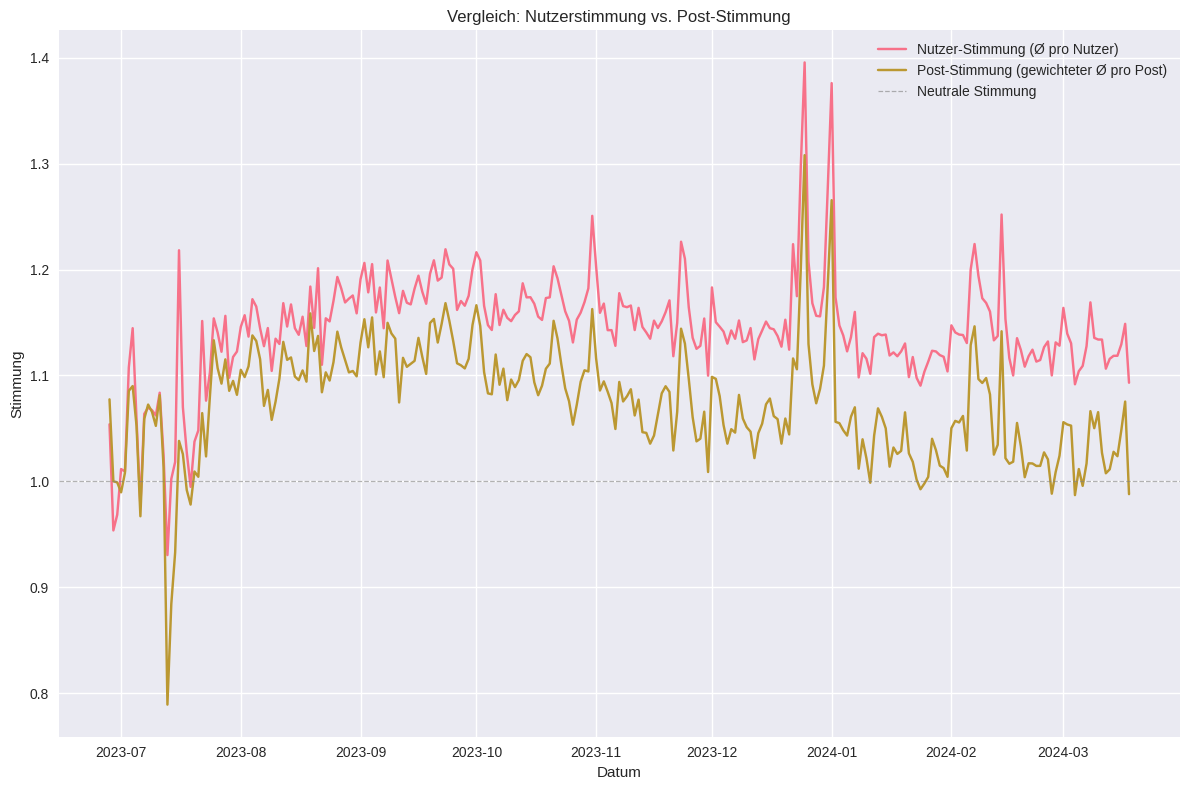

Korrelation: 0.848


In [19]:
#Visualisierung der Nutzer- vs. Post-Stimmung über die Zeit
plt.plot(df_summary["mean_sentiment_per_user"], label="Nutzer-Stimmung (Ø pro Nutzer)")
plt.plot(df_summary["mean_sentiment_per_post"], label="Post-Stimmung (gewichteter Ø pro Post)")

plt.axhline(1.0, color="grey", linestyle="--", linewidth=0.9, alpha=0.6, label="Neutrale Stimmung")

plt.title("Vergleich: Nutzerstimmung vs. Post-Stimmung")
plt.xlabel("Datum")
plt.ylabel("Stimmung")
plt.legend()
plt.tight_layout()
plt.show()

#Korrelation
correlation = df_summary["mean_sentiment_per_user"].corr(df_summary["mean_sentiment_per_post"])
print(f"Korrelation: {correlation:.3f}")

### Aufgabe 2.4. – *Montagsblues?* (4 Punkte)

#### Aufgabe 2.4.1. – Saisonale Zerlegung (2 Punkte)

Wiederholen Sie die gleichen Schritte für die saisonale Zerlegung und wenden Sie sie nun mit der Funktion `statsmodels.tsa.seasonal.STL` auf die Stimmungsdaten an. Sie müssen die Frequenzspektrumanalyse nicht erneut durchführen. Wir nehmen die a-priori-Periode von 7 Tagen.

In [20]:
#Nutzer Stimmung
stl_user = STL(df_summary["mean_sentiment_per_user"], period=7, robust=True)
result_user = stl_user.fit()

#Post Stimmung
stl_post = STL(df_summary["mean_sentiment_per_post"], period=7, robust=True)
result_post = stl_post.fit()

Stellen Sie die Zerlegung der Komponenten `trend`, `residual` und `seasonal` grafisch dar.

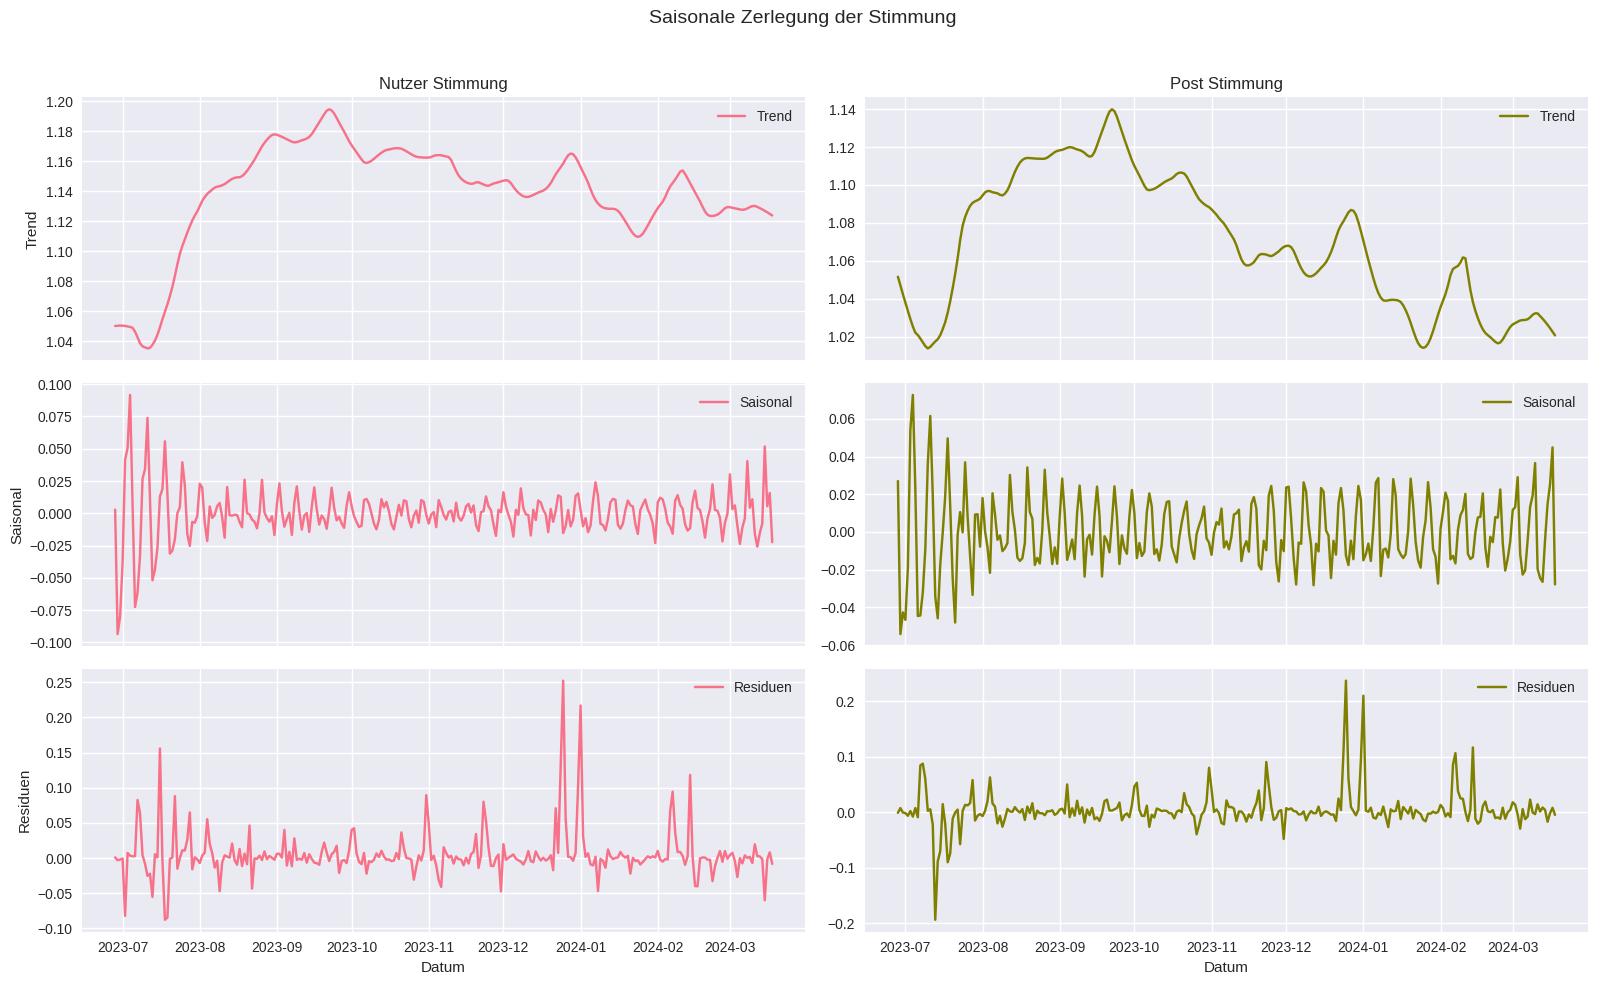

In [21]:
#2 Spalten, links Nutzer und rechts Post
fig, axes = plt.subplots(3,2, figsize=(16,10), sharex=True)

#Nutzer Stimmung
axes[0,0].plot(result_user.trend, label="Trend")
axes[0,0].set_ylabel("Trend")
axes[0,0].legend()

axes[1,0].plot(result_user.seasonal, label="Saisonal")
axes[1,0].set_ylabel("Saisonal")
axes[1,0].legend()

axes[2,0].plot(result_user.resid, label="Residuen")
axes[2,0].set_ylabel("Residuen")
axes[2,0].legend()
axes[2,0].set_xlabel("Datum")

#Post Stimmung
axes[0,1].plot(result_post.trend, label="Trend", color="olive")
axes[0,1].legend()

axes[1,1].plot(result_post.seasonal, label="Saisonal", color="olive")
axes[1,1].legend()

axes[2,1].plot(result_post.resid, label="Residuen", color="olive")
axes[2,1].legend()
axes[2,1].set_xlabel("Datum")

#Achsenüberschriften
for ax, title in zip(axes[0], ["Nutzer Stimmung", "Post Stimmung"]):
    ax.set_title(title)

plt.suptitle("Saisonale Zerlegung der Stimmung", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Nennen Sie zwei Ereignisse, die in den Residuen zu sehen sind.

Die Residuen Analyse zeigt zwei auffälige Ereignisse.
1. Im Sommer 2023 sank die Stimmung deutlich. Das liegt wahrscheinlich an einem Nutzer Boykott nach rassistischen Handles. Am 5. Juli 2023 erhielt Bluesky eine Seed-Runde über 8 Millionen USD,
    was große Aufmerksamkeit brachte. Gleichzeitig gabe es eine Kontroverse: Manche Nutzer erhielten rassistische Slurs im Handle, was zu einem Posting stopp von Nutzern und einer öffentlichen
    Entschuldigung seitens Bluesky führte.
2. Ende 2023/2024 stieg die Stimmung stark. Ein Grund dafür könnten die Feiertage sein. Außerdem sind einige bekannte Personen zu diesem Zeitpunkt von Twitter auf Bluesky gewechselt. 

#### Aufgabe 2.4.2. – Wochentagseffekt (2 Punkte)

Stellen Sie den Einfluss des Wochentags auf die durchschnittliche Stimmung grafisch dar. Was sehen Sie?

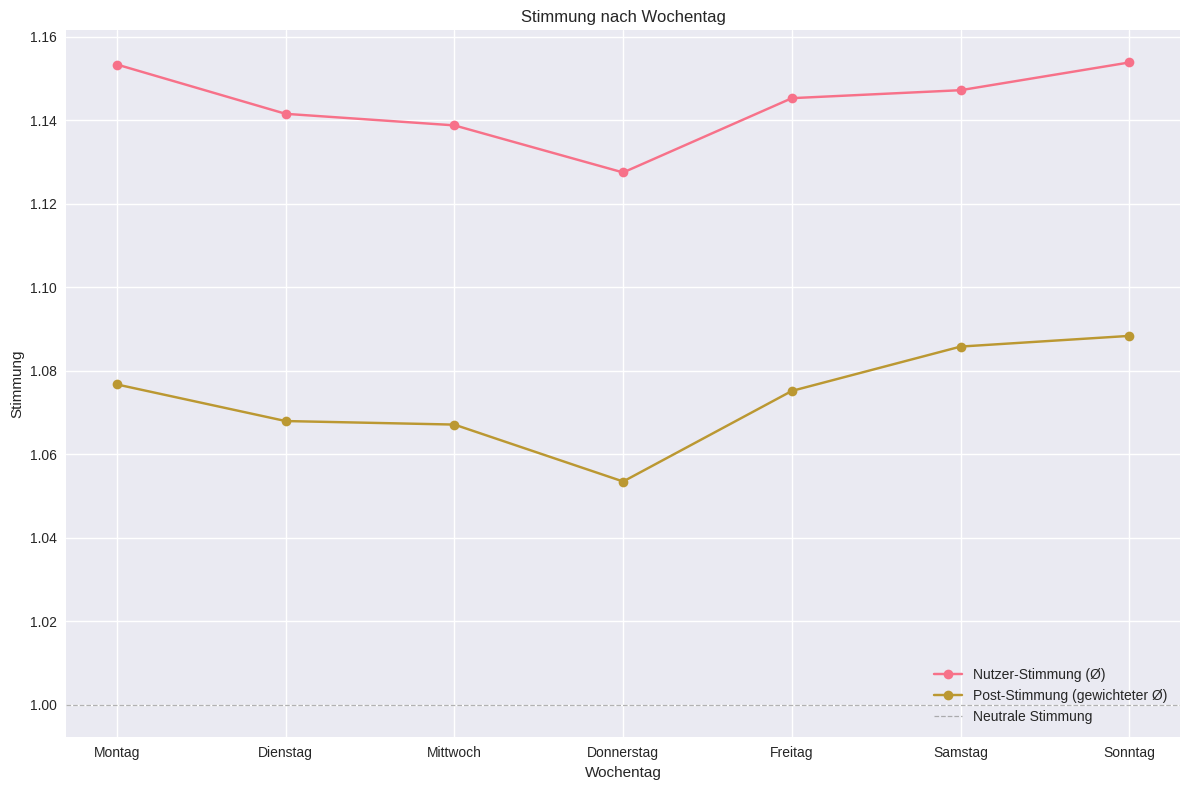

In [22]:
df_summary_with_wochentag, weekday_order = prepare_wochentag(df_summary)

mean_user = df_summary_with_wochentag.groupby("wochentag")["mean_sentiment_per_user"].mean().reindex(weekday_order)
mean_post = df_summary_with_wochentag.groupby("wochentag")["mean_sentiment_per_post"].mean().reindex(weekday_order)

# Plot
plt.plot(weekday_order, mean_user, marker='o', label="Nutzer-Stimmung (Ø)")
plt.plot(weekday_order, mean_post, marker='o', label="Post-Stimmung (gewichteter Ø)")

# Neutrale Stimmungslinie
plt.axhline(1.0, color="grey", linestyle="--", linewidth=0.9, alpha=0.6, label="Neutrale Stimmung")

# Beschriftung & Layout
plt.title("Stimmung nach Wochentag")
plt.xlabel("Wochentag")
plt.ylabel("Stimmung")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

### Aufgabe 2.5. – Sehr aktive Nutzer (2 Punkte)

Zu guter Letzt wollen wir uns die Verteilung der durchschnittlichen Anzahl von Beiträgen pro Tag der Bluesky-Nutzer ansehen. Transformieren Sie die Daten so, dass eine Verteilung sichtbar wird. Was sehen Sie?

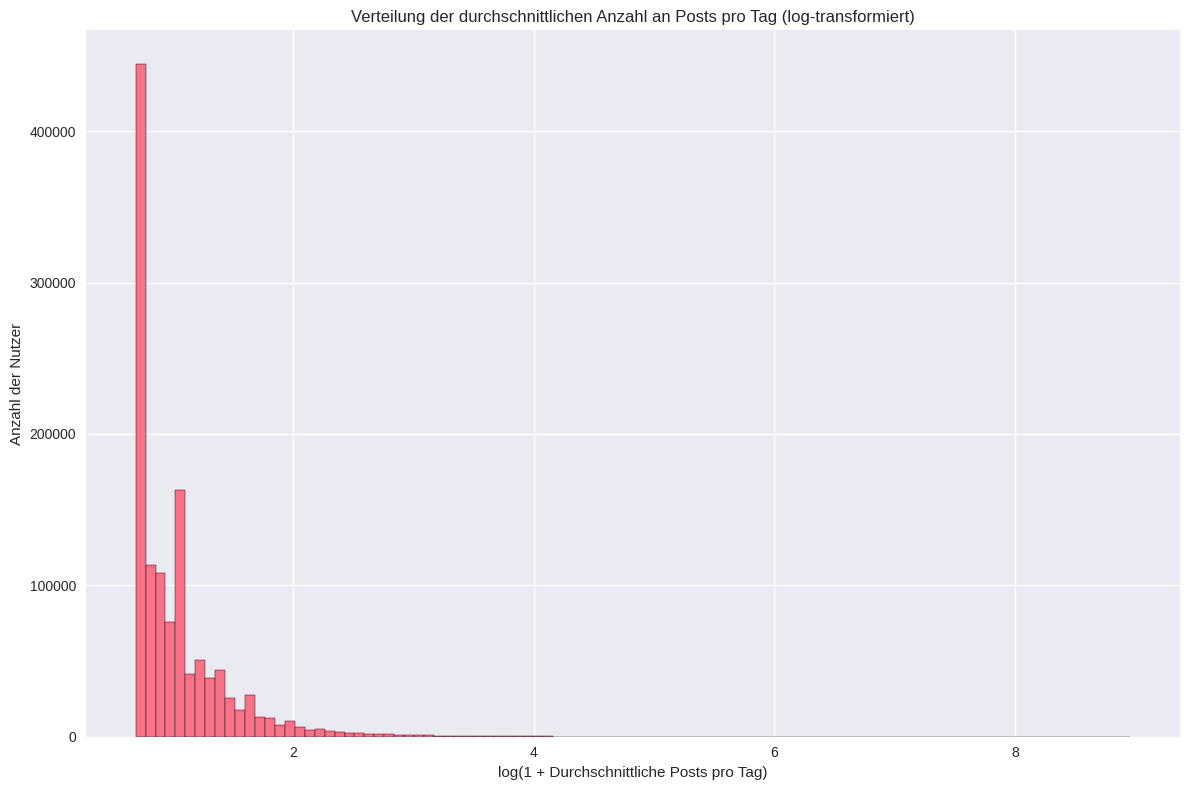

In [23]:
# Vorsicht bei log(0) → Kleine Werte entfernen oder +1 addieren
user_stats["log_mean_posts_per_day"] = np.log1p(user_stats["mean_posts_per_day"])

user_stats["log_mean_posts_per_day"].plot(kind="hist", bins=100, edgecolor="black")

plt.title("Verteilung der durchschnittlichen Anzahl an Posts pro Tag (log-transformiert)")
plt.xlabel("log(1 + Durchschnittliche Posts pro Tag)")
plt.ylabel("Anzahl der Nutzer")
plt.tight_layout()
plt.show()

#Man sieht, dass die meisten Nutzer sehr wenig täglich posten, weniger als ein Post am Tag. Die meisten Nutzer fallen in den bereich log(1+x) < 1.5, das entspricht etwa 0-3 posts pro Tag

___
## Aufgabe 3: Statistiken (17 Punkte)

### Aufgabe 3.1. – Auswirkungen des Wochentags auf das Posting-Verhalten (6 Punkte)

Um festzustellen, ob die Auswirkungen des Wochentags auf die Anzahl der Posts signifikant sind, verwenden wir eine lineare Regression, um ein statistisches Maß zu erhalten. Regressieren Sie das extrahierte saisonale Muster vom Wochentag. Informieren Sie sich über die Dummy variable trap und vermeiden Sie diese, indem Sie **keinen** Intercept einbeziehen. Überlegen Sie, was dies bedeutet oder wie das Modell und seine Ergebnisse zu interpretieren sind, und denken Sie daran, was die saisonale Komponente widerspiegelt (oder lesen Sie noch einmal darüber nach). Geben Sie dann die Gesamtstatistik für das Modell und die Statistiken für die Auswirkungen der verschiedenen Wochentage unter Verwendung eines Signifikanzniveaus von &alpha; = 0,05 an und interpretieren Sie die Ergebnisse.

In [24]:
# Wochentag als Dummy-Variablen (One-Hot-Encoding) ohne Drop einer Kategorie
df_seasonal["weekday"] = df_seasonal.index.dayofweek
X = pd.get_dummies(df_seasonal["weekday"], prefix="weekday", drop_first=False)
y = df_seasonal["seasonal"]

# Lineare Regression ohne Intercept (alle Wochentage bleiben im Modell)
model = sm.OLS(y, X)
results = model.fit()

# Regressionszusammenfassung
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               seasonal   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     95.57
Date:                Fri, 01 Aug 2025   Prob (F-statistic):           1.13e-62
Time:                        12:50:04   Log-Likelihood:                -2992.1
No. Observations:                 265   AIC:                             5998.
Df Residuals:                     258   BIC:                             6023.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
weekday_0  -1073.7006   3186.327     -0.337      0.7

#Kommentar Interpretation
Die lineare Regression zeigt, dass der Wochentag einen signifikanten Einfluss auf die saisonale Posting-Aktivität hat (R² = 0.69, F = 95.57, p < 0.001). 
Nach Anwendung der Benjamini-Hochberg-Korrektur bleiben alle Wochentagseffekte außer Montag signifikant. 
Besonders hohe Aktivität ist an Freitagen zu beobachten, während Wochenenden mit signifikant geringerer Posting-Frequenz einhergehen.

Als strenge Statistiker müssen wir eine Korrektur für multiple Vergleiche vornehmen, da wir 7 Tests durchführen. Führen Sie eine Korrektur für multiple Vergleiche durch. Sind die Wochentagseffekte immer noch signifikant?

In [25]:
# p-Werte der Regression
p_values = results.pvalues

# Korrektur für multiple Tests (Benjamini-Hochberg FDR)
rejected, pvals_corrected, _, _ = multipletests(p_values, alpha=0.05, method='fdr_bh')

# Zusammenfassung
pd.DataFrame({
    "Wochentag": X.columns,
    "p (unkorrigiert)": p_values.values,
    "p (korrigiert)": pvals_corrected,
    "signifikant": rejected
})

,Wochentag,p (unkorrigiert),p (korrigiert),signifikant
0,weekday_0,7.364125e-01,7.364125e-01,False
1,weekday_1,3.036830e-09,5.314452e-09,True
2,weekday_2,9.056926e-08,1.267970e-07,True
3,weekday_3,3.929749e-04,4.584707e-04,True
4,weekday_4,3.318989e-23,1.161646e-22,True
5,weekday_5,1.097618e-21,2.561108e-21,True
6,weekday_6,3.572637e-41,2.500846e-40,True


### Aufgabe 3.2. – Auswirkungen der Wochentage auf die Stimmung der Nutzer (4 Punkte)

Wir wiederholen das Verfahren zur Stimmungsanalyse, um zu sehen, ob wir tatsächlich Muster der Auswirkungen pro Wochentag ableiten können. Gilt dies auch nach Korrektur für multiple Vergleiche? Haben Wochentage einen stärkeren Einfluss auf Beiträge oder die Stimmung?

In [26]:
# DataFrame mit saisonaler Stimmung und Wochentag
df_user_seasonal = pd.DataFrame({
    "seasonal_user": result_user.seasonal,
})
df_user_seasonal["weekday"] = df_user_seasonal.index.dayofweek

# Designmatrix und Zielvariable
X_user = pd.get_dummies(df_user_seasonal["weekday"], prefix="weekday", drop_first=False)
y_user = df_user_seasonal["seasonal_user"]

# Regression ohne Intercept
model_user = sm.OLS(y_user, X_user)
results_user = model_user.fit()
print(results_user.summary())


                            OLS Regression Results                            
Dep. Variable:          seasonal_user   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     3.866
Date:                Fri, 01 Aug 2025   Prob (F-statistic):            0.00103
Time:                        12:50:04   Log-Likelihood:                 692.73
No. Observations:                 265   AIC:                            -1371.
Df Residuals:                     258   BIC:                            -1346.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
weekday_0     -0.0001      0.003     -0.041      0.9

In [27]:
#Multiple-Testing-Korrektur
pvals_user = results_user.pvalues
rejected_user, pvals_corr_user, _, _ = multipletests(pvals_user, alpha=0.05, method='fdr_bh')

pd.DataFrame({
    "Wochentag": X_user.columns,
    "p (unkorrigiert)": pvals_user.values,
    "p (korrigiert)": pvals_corr_user,
    "signifikant": rejected_user
})

,Wochentag,p (unkorrigiert),p (korrigiert),signifikant
0,weekday_0,0.967327,0.967327,False
1,weekday_1,0.869478,0.967327,False
2,weekday_2,0.314953,0.551168,False
3,weekday_3,0.000214,0.001498,True
4,weekday_4,0.874403,0.967327,False
5,weekday_5,0.125929,0.293833,False
6,weekday_6,0.016963,0.059371,False


### Aufgabe 3.3. – Bot-ähnliches Verhalten und Nutzerstimmung (7 Punkte)

Nun werfen wir einen Blick auf die Benutzerdaten. Im Preprocessing-Teil haben wir bereits einen Datenrahmen mit Features erstellt, die die Benutzer charakterisieren. Da einige Benutzer weit mehr als die durchschnittliche Anzahl an Beiträgen pro Tag veröffentlichen, scheint es, als befänden sich Bots im Netzwerk, die eine große Anzahl an Beiträgen erstellen. Leider enthält unser Datensatz keine Features, die angeben, ob ein Nutzer ein Bot ist oder nicht. Da wir jedoch zuvor eine Liste mit Features erstellt haben, können wir nun versuchen, diese zu nutzen, um einige Regeln aufzustellen.

Erstellen Sie eine neue Spalte `is_bot` im Datensatz basierend auf folgender Logik:\
Ein Nutzer wird als Bot markiert, wenn beide folgenden Bedingungen erfüllt sind:
1. Sehr hohe Aktivität: `post_count_total` > 1000
2. Posting-Frequenz ist sehr regelmäßig: `cv_days_between_posts` < 0.5

In Aufgabe 1.2 wurden mehrere Features basierend auf dem zeitlichen Abstand zwischen Beiträgen für jeden Nutzer berechnet: `"mean_days_between_posts", "median_days_between_posts", "std_days_between_posts", "cv_days_between_posts"`.

Allerdings fehlen bei einigen Nutzern ein oder mehrere dieser Werte – zum Beispiel bei Nutzern, die nur einmal oder gar nicht gepostet haben. Entfernen Sie alle Zeilen aus dem Datensatz, bei denen einer dieser vier Werte fehlt (NaN).

In [28]:
# Entfernen von Zeilen mit fehlenden Zeitabstandsmerkmalen
user_stats_clean = user_stats.dropna(subset=[
    "mean_days_between_posts",
    "median_days_between_posts",
    "std_days_between_posts",
    "cv_days_between_posts"
])

# Bot-Definition gemäß Aufgabenstellung
user_stats_clean["is_bot"] = (
    (user_stats_clean["total_posts"] > 1000) &
    (user_stats_clean["cv_days_between_posts"] < 0.5)
)

In [29]:
user_stats_clean["is_bot"].value_counts()

is_bot
False    786184
True       9166
Name: count, dtype: int64

Testen Sie, ob sich Bots und Nicht-Bots in den folgenden Metriken signifikant unterscheiden:
1. `sentiment_mean`
2. `sentiment_std`

Für jede Metrik:
- Stellen Sie beide Verteilungen (Bots und Nicht-Bots) für beide Metriken mit geeigneten Diagrammen dar.
- Wählen Sie einen geeigneten Test (parametrisch, nichtparametrisch oder Bootstrapping).
- Begründen und überprüfen Sie die Annahmen Ihres Tests.
- Geben Sie Ihren p-Wert an und ob er signifikant ist.

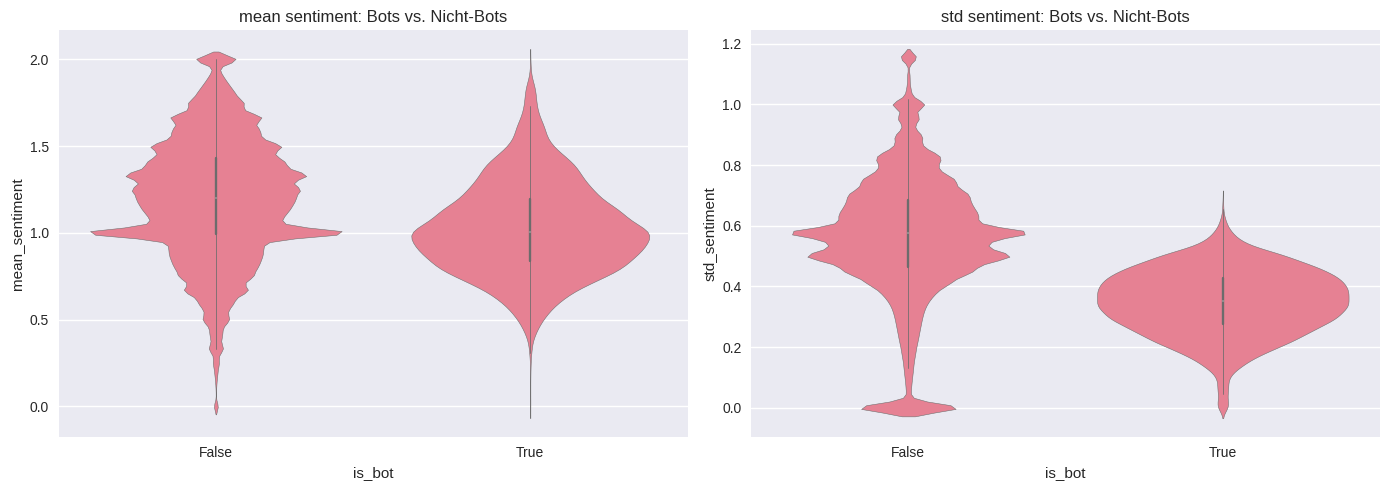

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.violinplot(data=user_stats_clean, x="is_bot", y="mean_sentiment", ax=axes[0], inner="box")
axes[0].set_title("mean sentiment: Bots vs. Nicht-Bots")

sns.violinplot(data=user_stats_clean, x="is_bot", y="std_sentiment", ax=axes[1], inner="box")
axes[1].set_title("std sentiment: Bots vs. Nicht-Bots")

plt.tight_layout()
plt.show()

In [31]:
# Gruppen trennen
bots = user_stats_clean[user_stats_clean["is_bot"] == True]
non_bots = user_stats_clean[user_stats_clean["is_bot"] == False]

# Test für mean_sentiment
u1, p1 = mannwhitneyu(bots["mean_sentiment"], non_bots["mean_sentiment"], alternative="two-sided")

# Test für std_sentiment
u2, p2 = mannwhitneyu(bots["std_sentiment"], non_bots["std_sentiment"], alternative="two-sided")

print(f"mean_sentiment: p = {p1:.4f}")
print(f"std_sentiment: p = {p2:.4f}")


mean_sentiment: p = 0.0000
std_sentiment: p = 0.0000


Zur Untersuchung der Unterschiede in der durchschnittlichen und der streuungsbezogenen Nutzerstimmung (mean_sentiment, std_sentiment) zwischen Bots und Nicht-Bots
wurde der nichtparametrische Mann-Whitney-U-Test verwendet. Dieser wurde gewählt, da die Verteilungen visuell nicht normalverteilt erscheinen und die Gruppengrößen unterschiedlich sind.

Die Tests ergaben für beide Metriken hochsignifikante Unterschiede (p < 0.0001). Daraus lässt sich schließen, dass sich Bots und Nicht-Bots systematisch in ihrer Sentimentverteilung unterscheiden.

___ 
## Aufgabe 4: Machine Learning (40 Punkte)

### Aufgabe 4.1. – Unsupervised Learning (15 Punkte)

Anstatt uns auf fest programmierte Regeln zur Erkennung von Bots zu verlassen, wenden wir uns nun dem unsupervised Machine Learning zu, um Nutzer mit abnormalen Verhaltensmustern zu identifizieren.

Wir könnten zwar unsere regelbasierten Bot-Labels zum Trainieren eines überwachten Modells verwenden, doch dadurch würde das Modell lediglich lernen, genau die von uns definierten Regeln zu replizieren – es würde also im Grunde nichts Neues lernen. Da wir nicht vollständig davon überzeugt sind, dass diese Regeln genau das erfassen, was einen Bot ausmacht, entscheiden wir uns, sie nicht als Grundwahrheit zu verwenden.

Ohne gekennzeichnete Beispiele für Bots und Nicht-Bots können wir jedoch kein überwachtes Lernen anwenden. Hier kommen unsupervised Lernmethoden wie Clustering oder Anomalieerkennung ins Spiel. Diese Ansätze ermöglichen es uns, potenziell verdächtiges Nutzerverhalten ohne vordefinierte Kennzeichnungen zu entdecken und können dabei helfen, neue Muster aufzudecken, die unsere handgefertigten Regeln möglicherweise übersehen würden.

Für diese Aufgabe verwenden wir den Isolation-Forest-Algorithmus, eine beliebte Methode zur Anomalieerkennung. Ein Isolation Forest ist ein Ensemble aus vielen Isolation Trees, daher der Name „Forest“ (Wald). Ein Ensemble ist eine Technik, bei der mehrere Modelle kombiniert werden, um ein stärkeres, robusteres Modell zu erstellen. Während einzelne Modelle – insbesondere wenn sie randomisiert sind – Fehler machen oder ineffiziente Wege einschlagen können, hilft die Kombination vieler Modelle (z. B. durch Mittelwertbildung oder Abstimmung) dabei, den Einfluss dieser einzelnen Fehler zu reduzieren und konsistente Muster über die Modelle hinweg zu verstärken.

Ein Isolation Tree ist ein [Baum](https://de.wikipedia.org/wiki/Baum_(Graphentheorie)), der durch rekursive Partitionierung der Daten funktioniert. An jedem Knotenpunkt wird Folgendes durchgeführt:
- Zufällige Auswahl eines Features.
- Auswahl eines zufälligen Teilungswerts zwischen dem Minimum und Maximum dieses Features innerhalb der aktuellen Teilmenge.
- Entsprechende Teilung der Daten und Wiederholung des Vorgangs für jede Untergruppe.

Dies wird so lange fortgesetzt, bis jeder Datenpunkt in seinem eigenen Blatt isoliert ist oder eine maximale Tiefe erreicht ist. Die Intuition hinter dieser Methode ist, dass Anomalien leichter zu isolieren sind – sie erfordern weniger Teilungen, um vom Rest der Daten getrennt zu werden.

Im Isolation Forest berechnen wir für jeden Datenpunkt einen Anomalie-Score auf der Grundlage der durchschnittlichen Pfadlänge (d. h. der Anzahl der Teilungen), die erforderlich ist, um diesen Punkt über alle Bäume hinweg zu isolieren. Punkte mit kürzeren durchschnittlichen Pfadlängen werden als anomaler angesehen.

Weitere Informationen zu Isolation Forests finden Sie [hier](https://www.datacamp.com/tutorial/isolation-forest).

#### Aufgabe 4.1.1. - Feature Engineering (1 Punkt)

Zur Vorbereitung auf das unüberwachte Lernen müssen Sie einen sauberen Satz numerischer Features extrahieren, die das Nutzerverhalten und die Nutzerinteraktion beschreiben. Wählen Sie nur die folgenden Spalten aus, die aussagekräftige Verhaltens- und Interaktionsmetriken darstellen: `‚post_count_total‘, ‚sentiment_mean‘, ‚sentiment_std‘, ‚replied_count‘, ‚reposted_count‘, ‚quoted_count‘, ‚days_active‘, ‚cv_days_between_posts‘, ‚replied_count_by_others‘, ‚reposted_count_by_others‘, ‚quoted_count_by_others‘`

In [32]:
# Features für Isolation Forest aus dem korrekten DataFrame 'merged'
feature_columns = [
    "total_posts",
    "mean_sentiment",
    "std_sentiment",
    "active_days",
    "cv_days_between_posts",
    "replied_count",
    "reposted_count",
    "quoted_count",
    "replied_count_by_others",
    "reposted_count_by_others",
    "quoted_count_by_others"
]

user_features = merged[feature_columns].dropna()

#### Aufgabe 4.1.3. - IsolationForest (4 Punkt
Verwenden Sie die ausgewählten verhaltens- und sentimentbasierten Features, um mithilfe eines Isolation Forest anomale Benutzer im Datensatz zu erkennen. \
Legen Sie Parameter für Reproduzierbarkeit und Vergleichbarkeit fest:
- Verwenden Sie einen festen `random_state`.
- Setzen Sie den Parameter `contamination` so, dass er dem Anteil der Bots im Datensatz entspricht, wie in Aufgabe 3.3 ermittelt. Dadurch wird sichergestellt, dass das Isolation-Forest-Modell eine vergleichbare Klassifizierung wie Ihre früheren regelbasierten `is_bot`-Labels für Aufgabe 4.1.5 liefert.

In [33]:
# Bot-Anteil aus bestehender Spalte berechnen
contamination = user_stats_clean["is_bot"].mean()

# Isolation Forest initialisieren und trainieren
iso_forest = IsolationForest(contamination=contamination, random_state=42)
iso_forest.fit(user_features)

# Ergebnisse zum DataFrame hinzufügen
user_stats_clean["anomaly_score"] = iso_forest.decision_function(user_features)
user_stats_clean["is_anomaly"] = iso_forest.predict(user_features) == -1


#### Aufgabe 4.1.4. - Feature-Bedeutung (5 Punkte)

Nach dem Training Ihres IsolationForest ist es wichtig, Erkenntnisse darüber zu gewinnen, welche Features die Entscheidung des Modells beeinflussen, einen Benutzer als Ausreißer zu klassifizieren. Der IsolationForest ist jedoch ein Black-Box-Modell und liefert keine leicht interpretierbaren Entscheidungsregeln oder Feature-Bedeutungen.

Um dieses Problem zu lösen, trainieren Sie ein Ersatzmodell, z. B. einen einfachen `DecisionTreeClassifier`, um das Verhalten des IsolationForest zu approximieren. Ein Ersatzmodell ist ein einfacheres, interpretierbares Modell, das mit denselben Eingabe-Features trainiert wird, jedoch mit den vom Originalmodell vorhergesagten Labels. Auf diese Weise können Sie verstehen, auf welche Features sich der IsolationForest stützt – wenn auch indirekt.

Verwenden Sie dieselben Features, der zum Trainieren des IsolationForest verwendet wurde, aber trainieren Sie nun einen Entscheidungsbaum in einer überwachten Umgebung unter Verwendung der Ausreißer-Labels aus dem IsolationForest. Konvertieren Sie diese bei Bedarf in besser interpretierbare Labels (z. B. „Ausreißer“ vs. „kein Ausreißer“).

Wählen Sie Modellparameter, die den Baum einfach und interpretierbar halten – zum Beispiel einen flachen Baum. Der Ersatz muss zwar nicht perfekt den IsolationForest nachbilden, Sie sollten jedoch dennoch bewerten, wie genau er die Entscheidungen des ursprünglichen Modells nachahmt (z. B. anhand der Genauigkeit oder einer Confusionmatrix).

Visualisieren Sie abschließend den Entscheidungsbaum oder geben Sie seine Entscheidungsregeln aus und ziehen Sie daraus Schlussfolgerungen darüber, welche Features für den IsolationForest am wichtigsten zu sein scheinen.

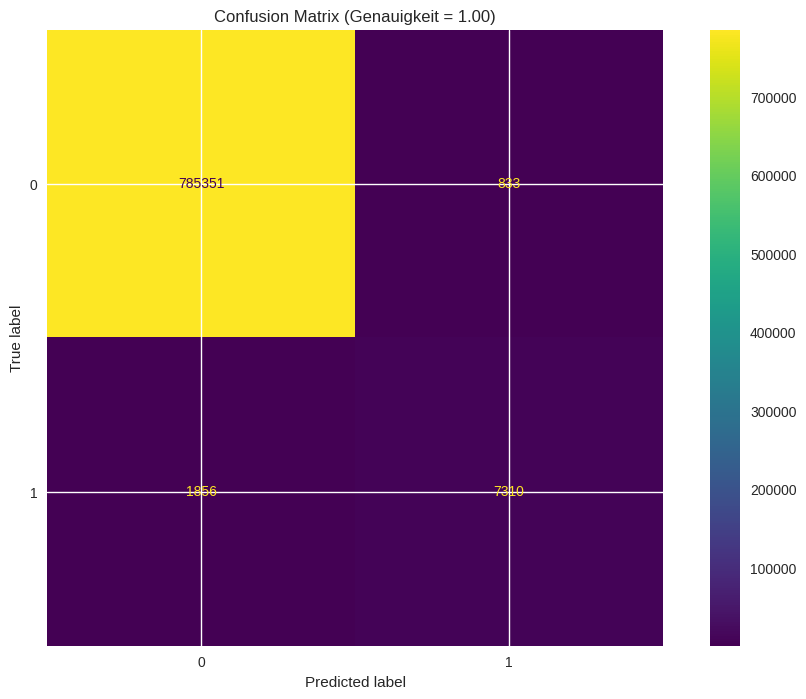

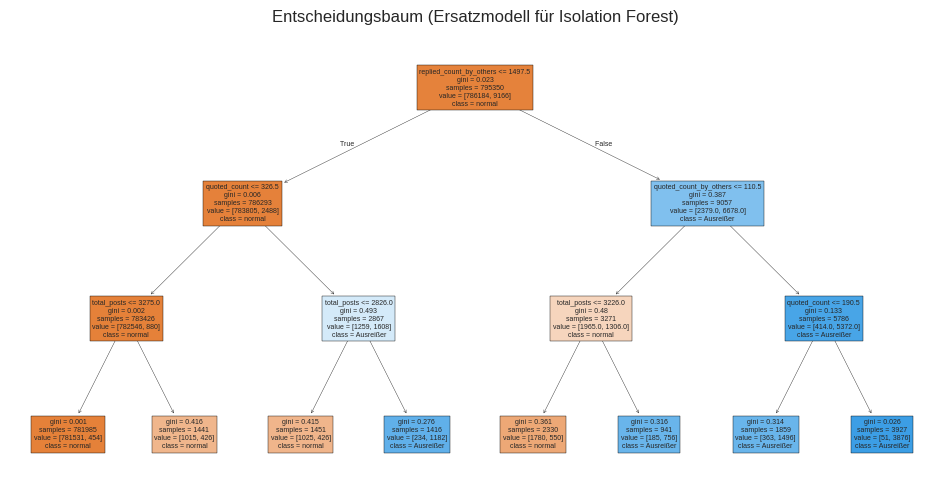

In [34]:
# Zielvariable
y_surrogate = user_stats_clean["is_anomaly"].astype(int)

# Ersatzmodell trainieren
surrogate_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
surrogate_tree.fit(user_features, y_surrogate)

# Vorhersage
y_pred = surrogate_tree.predict(user_features)

# Manuell berechnete Genauigkeit (kein extra Import nötig)
acc = (y_pred == y_surrogate).mean()

# Confusion-Matrix
ConfusionMatrixDisplay.from_predictions(y_surrogate, y_pred)
plt.title(f"Confusion Matrix (Genauigkeit = {acc:.2f})")
plt.show()

# Baumvisualisierung
plt.figure(figsize=(12, 6))
plot_tree(surrogate_tree, feature_names=user_features.columns, class_names=["normal", "Ausreißer"], filled=True)
plt.title("Entscheidungsbaum (Ersatzmodell für Isolation Forest)")
plt.show()


#### Aufgabe 4.1.5. - Anomalie vs. regelbasierte Klassifizierung (3 Punkte)
Bewerten Sie, wie gut diese erkannten Anomalien mit Ihren bestehenden `is_bot`-Labels aus dem regelbasierten Ansatz übereinstimmen.

Erstellen Sie eine Kreuztabelle (im Stil einer Confusionmatrix) mit `pd.crosstab()` und vergleichen Sie diese beiden Klassifizierungen/Labels. Interpretieren Sie die Ergebnisse, indem Sie zwei kurze Beobachtungen niederschreiben, zum Beispiel:
- Wie gut stimmen die beiden Methoden überein?
- Gibt es Bots, die von einer Methode übersehen, von der anderen jedoch erkannt werden?

In [35]:
# Kreuztabelle: Regelbasierte Labels vs. Anomalie-Erkennung
pd.crosstab(user_stats_clean["is_bot"], user_stats_clean["is_anomaly"], rownames=["Regelbasiert (is_bot)"], colnames=["Anomalie (is_anomaly)"])


Anomalie (is_anomaly),False,True
Regelbasiert (is_bot),,
False,781149,5035
True,5035,4131


Die Mehrheit der Nutzer wird von beiden Methoden konsistent klassifiziert, insbesondere die große Gruppe der Nicht-Bots. 
Auch ein signifikanter Teil der als Bots markierten Nutzer wird vom IsolationForest als Anomalie erkannt (4 131 Nutzer).

Beide Methoden erkennen auch Nutzer, die die jeweils andere Methode übersehen hätte. Dies deutet darauf hin, dass der IsolationForest zusätzlich zu den Regelbots auch Muster erkennt, 
die nicht explizit über Schwellen definiert sind – und umgekehrt auch einige Regelbots nicht als Anomalien einstuft.

#### Aufgabe 4.1.6. - Statistischer Test (2 Punkte)

Testen Sie, ob sich Anomalien und Nicht-Anomalien in `sentiment_mean` und `sentiment_std` ähnlich wie in Aufgabe 3.3 signifikant unterscheiden. Visualisieren Sie die Verteilungen von `sentiment_mean` und `sentiment_std` getrennt für anomale Benutzer und nicht-anomale Benutzer.

In [52]:
# Aufteilen in Anomalien vs. Nicht-Anomalien
mean_anomaly = user_stats_clean[user_stats_clean["is_anomaly"]]["mean_sentiment"]
mean_normal  = user_stats_clean[~user_stats_clean["is_anomaly"]]["mean_sentiment"]

std_anomaly = user_stats_clean[user_stats_clean["is_anomaly"]]["std_sentiment"]
std_normal  = user_stats_clean[~user_stats_clean["is_anomaly"]]["std_sentiment"]

# Mann-Whitney U-Test durchführen
u_mean, p_mean = mannwhitneyu(mean_anomaly, mean_normal, alternative="two-sided")
u_std, p_std   = mannwhitneyu(std_anomaly, std_normal, alternative="two-sided")

# Ergebnisse ausgeben
print(f"mean_sentiment: p = {p_mean:.4f}")
print(f"std_sentiment:  p = {p_std:.4f}")


mean_sentiment: p = 0.0000
std_sentiment:  p = 0.0000


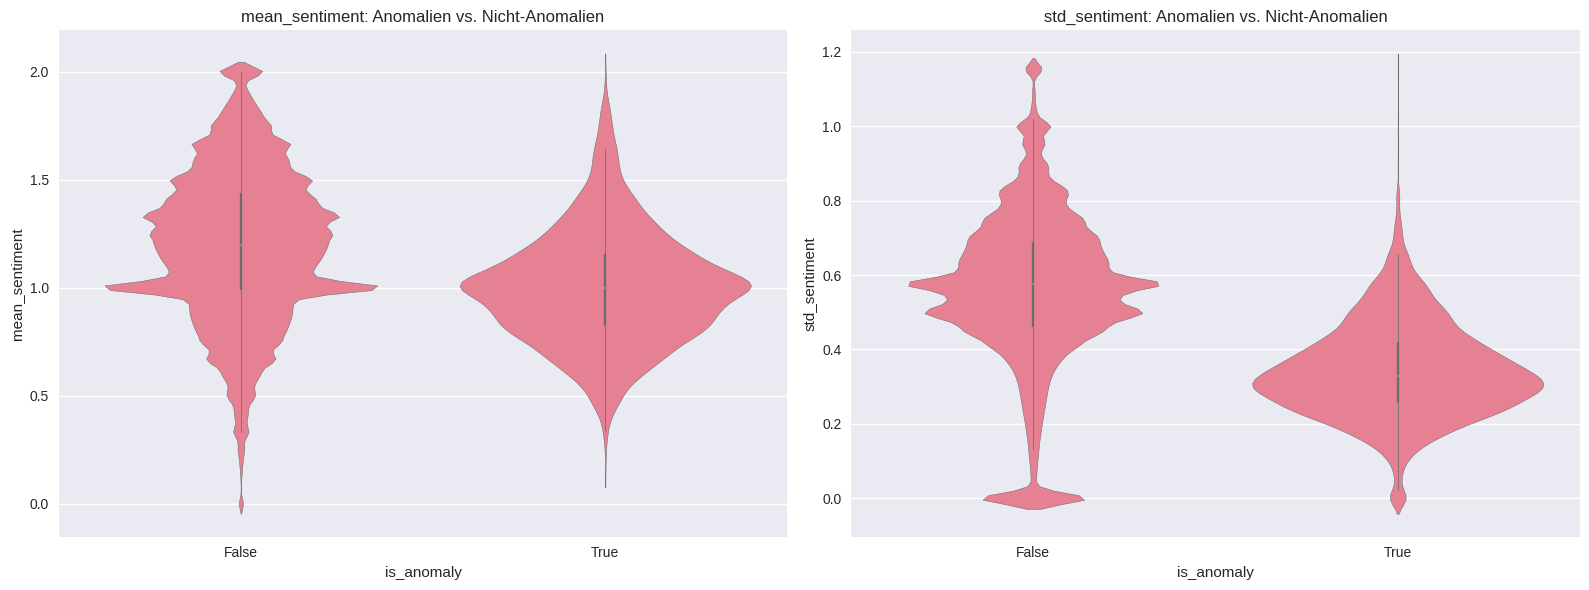

In [53]:
# Violinplots für sentiment_mean und sentiment_std nach Anomalie-Label
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.violinplot(data=user_stats_clean, x="is_anomaly", y="mean_sentiment", ax=axes[0])
axes[0].set_title("mean_sentiment: Anomalien vs. Nicht-Anomalien")
axes[0].set_xlabel("is_anomaly")

sns.violinplot(data=user_stats_clean, x="is_anomaly", y="std_sentiment", ax=axes[1])
axes[1].set_title("std_sentiment: Anomalien vs. Nicht-Anomalien")
axes[1].set_xlabel("is_anomaly")

plt.tight_layout()
plt.show()


### Aufgabe 4.2 – Clustering (25 Punkte)

Das Managementteam von Bluesky möchte tiefere Einblicke in seine Nutzerbasis gewinnen und hat Sie als Datenanalyst um Hilfe gebeten. Das Team ist insbesondere daran interessiert, verschiedene Nutzertypen anhand ihrer Verhaltensmuster zu identifizieren.

Sie haben bereits einen Isolation Forest verwendet, um anomale Nutzer zu erkennen. Nun werden Sie eine umfassende Nutzersegmentierungsanalyse durchführen, indem Sie die folgenden Schritte befolgen.

#### Aufgabe 4.2.1. – Datenaufbereitung (3 Punkte)
Führen Sie den Isolation Forest erneut mit `contamination="auto"` aus, um anomale Benutzer zu identifizieren. Konzentrieren Sie Ihre nachfolgende Analyse auf die Benutzer, die vom Modell **nicht** als Ausreißer identifiziert wurden, da diese typischere Benutzerverhaltensmuster darstellen.

- Wenden Sie den Isolation Forest mit `contamination="auto"` an. 
- Geben Sie an, wie viele Benutzer als anomal und wie viele als normal klassifiziert wurden.
- Erstellen Sie eine Teilmenge, die nur die normalen (nicht anomalen) Benutzer für das Clustering enthält.

In [38]:
# Isolation Forest mit contamination="auto"
iso_forest_auto = IsolationForest(contamination="auto", random_state=42)
user_stats_clean["is_anomaly_auto"] = iso_forest_auto.fit_predict(user_features) == -1

# Anzahl Anomalien und Normalnutzer
num_anomalies = user_stats_clean["is_anomaly_auto"].sum()
num_normals = len(user_stats_clean) - num_anomalies

print(f"Anzahl normaler Nutzer: {num_normals}")
print(f"Anzahl anomaler Nutzer: {num_anomalies}")

# Nur normale Nutzer für Clustering
user_features_normal = user_features[~user_stats_clean["is_anomaly_auto"]]


Anzahl normaler Nutzer: 735676
Anzahl anomaler Nutzer: 59674


#### Aufgabe 4.2.2. – Feature Engineering (5 Punkte)
Erstellen Sie eine Teilmenge von Features für das Clustering, die Verhaltensmuster der Benutzer erfassen:

- Berechnen Sie `total_interactions` als Summe aus `replied_count`, `reposted_count` und `quoted_count`
- Erstellen Sie Features für die Interaktionsrate:
    - `reply_ratio` = replied_count / total_interactions (Behandlung der Division durch Null)
    - `repost_ratio` = reposted_count / total_interactions
    - `quote_ratio` = quoted_count / total_interactions
- Wenden Sie eine Log-Transformation auf die Interaktionszahlen an (fügen Sie vor der Log-Transformation 1 hinzu, um Nullen zu behandeln)
- Erläutern Sie, warum diese Transformationen für das Clustering und das Verständnis der Nutzer nützlich sind

In [39]:
# total_interactions berechnen
merged["total_interactions"] = (
    merged["replied_count"] +
    merged["reposted_count"] +
    merged["quoted_count"]
)

# Verhältnis-Features mit Division durch Null-Handling
merged["reply_ratio"] = merged["replied_count"] / merged["total_interactions"].replace(0, np.nan)
merged["repost_ratio"] = merged["reposted_count"] / merged["total_interactions"].replace(0, np.nan)
merged["quote_ratio"] = merged["quoted_count"] / merged["total_interactions"].replace(0, np.nan)

merged[["reply_ratio", "repost_ratio", "quote_ratio"]] = merged[["reply_ratio", "repost_ratio", "quote_ratio"]].fillna(0)

# Log-Transformation der Rohwerte
merged["log_replied"]  = np.log1p(merged["replied_count"])
merged["log_reposted"] = np.log1p(merged["reposted_count"])
merged["log_quoted"]   = np.log1p(merged["quoted_count"])


Die Interaktionsraten (reply_ratio, repost_ratio, quote_ratio) erlauben eine normalisierte Darstellung der Nutzeraktivität unabhängig vom Gesamtvolumen. 
So kann z. B. ein Nutzer mit wenigen, aber überwiegend replizierenden Beiträgen von einem mit vielen Zitaten unterschieden werden.

Die Log-Transformation reduziert extreme Skalenunterschiede zwischen sehr aktiven und inaktiven Nutzern und verringert Verzerrung durch Ausreißer. 
Dies ist besonders für Clustering-Algorithmen hilfreich, die auf Distanzen in Feature-Räumen basieren.

#### Aufgabe 4.2.3. – Optimale Clusterauswahl (8 Punkte)
Bestimmen Sie die optimale Anzahl von Clustern mithilfe der Silhouette-Methode. Die Silhouette-Methode bewertet die Clustering-Qualität, um die optimale Anzahl von Clustern k zu ermitteln. Sie sorgt für ein Gleichgewicht zwischen der Kohäsion innerhalb der Cluster und der Trennung zwischen den Clustern. Pro k wird ein Silhouette-Wert berechnet. Ein Wert nahe 1 bedeutet gut voneinander getrennte Cluster, ein Wert nahe 0 bedeutet überlappende Cluster und ein negativer Wert bedeutet falsch klassifizierte Cluster.

- Nehmen Sie die Features `log_replied`, `log_reposted`, `log_quoted`, `reply_ratio`, `repost_ratio`, `quote_ratio`
- Führen Sie einen `StandardScaler` auf diese Merkmale aus
- Testen Sie k-Means-Clustering für k = 2 bis 8
- Berechnen Sie die Silhouette-Werte für jedes k
- Zeichnen Sie die Silhouette-Werte und die Inertia-Werte auf und wählen Sie das optimale k aus
- Begründen Sie Ihre Wahl der optimalen Anzahl von Clustern

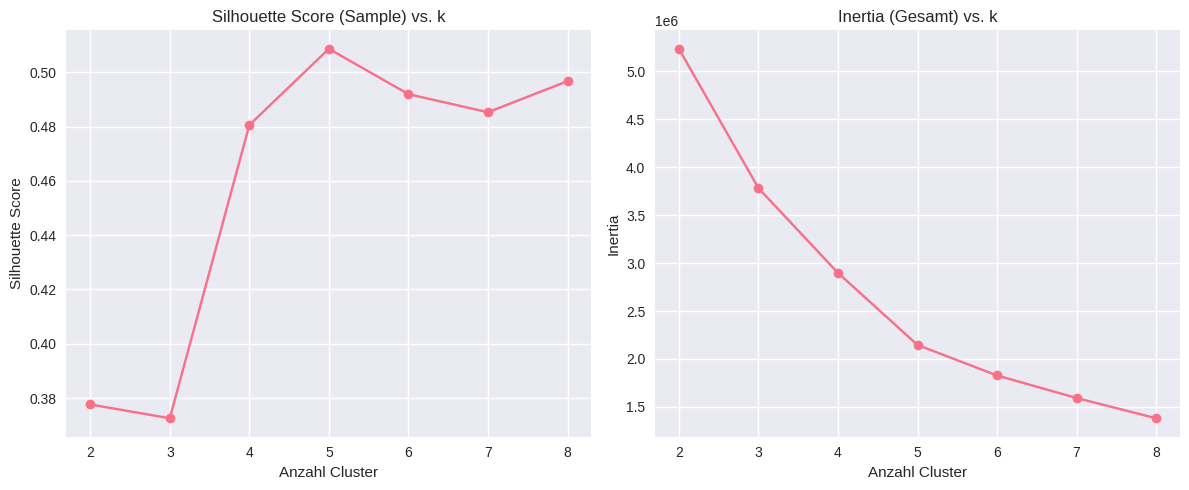

In [50]:
# Features
clustering_features = [
    "log_replied", "log_reposted", "log_quoted",
    "reply_ratio", "repost_ratio", "quote_ratio"
]

X = merged[clustering_features].copy()
X_scaled = StandardScaler().fit_transform(X)

# Zufällige Stichprobe für Silhouette Score (repräsentativ, aber effizient)
np.random.seed(42)
sample_indices = np.random.choice(len(X_scaled), size=10000, replace=False)
X_sample = X_scaled[sample_indices]

# Scores
silhouette_scores = []
inertia_scores = []
K_range = range(2, 9)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels_full = kmeans.fit_predict(X_scaled)
    labels_sample = labels_full[sample_indices]

    inertia_scores.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_sample, labels_sample))

# Plotten
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, silhouette_scores, marker='o')
plt.title("Silhouette Score (Sample) vs. k")
plt.xlabel("Anzahl Cluster")
plt.ylabel("Silhouette Score")

plt.subplot(1, 2, 2)
plt.plot(K_range, inertia_scores, marker='o')
plt.title("Inertia (Gesamt) vs. k")
plt.xlabel("Anzahl Cluster")
plt.ylabel("Inertia")

plt.tight_layout()
plt.show()


Die Silhouette-Analyse ergibt bei k = 5 den höchsten Wert (~0.51), was auf eine sehr gute Balance zwischen interner Clusterkohäsion und externer Trennung hindeutet.
Die Inertia-Kurve zeigt gleichzeitig bei k = 5 einen deutlichen Knick ("Elbow"), was darauf hinweist, dass zusätzliche Cluster danach nur noch wenig zusätzliche Erklärungskraft liefern.
Daher wird k = 5 als optimale Clusteranzahl gewählt.

#### Aufgabe 4.2.4. – Clustering und Visualisierung (5 Punkte)
Wenden Sie k-Means-Clustering mit Ihrem optimalen k an und erstellen Sie mindestens zwei verschiedene Visualisierungen Ihrer Cluster:
- PCA-Projektion (2D-Streudiagramm, nach Clustern farblich gekennzeichnet)
- Eine weitere Visualisierung Ihrer Wahl (t-SNE, UMAP oder Cluster-Charakteristik-Diagramme)

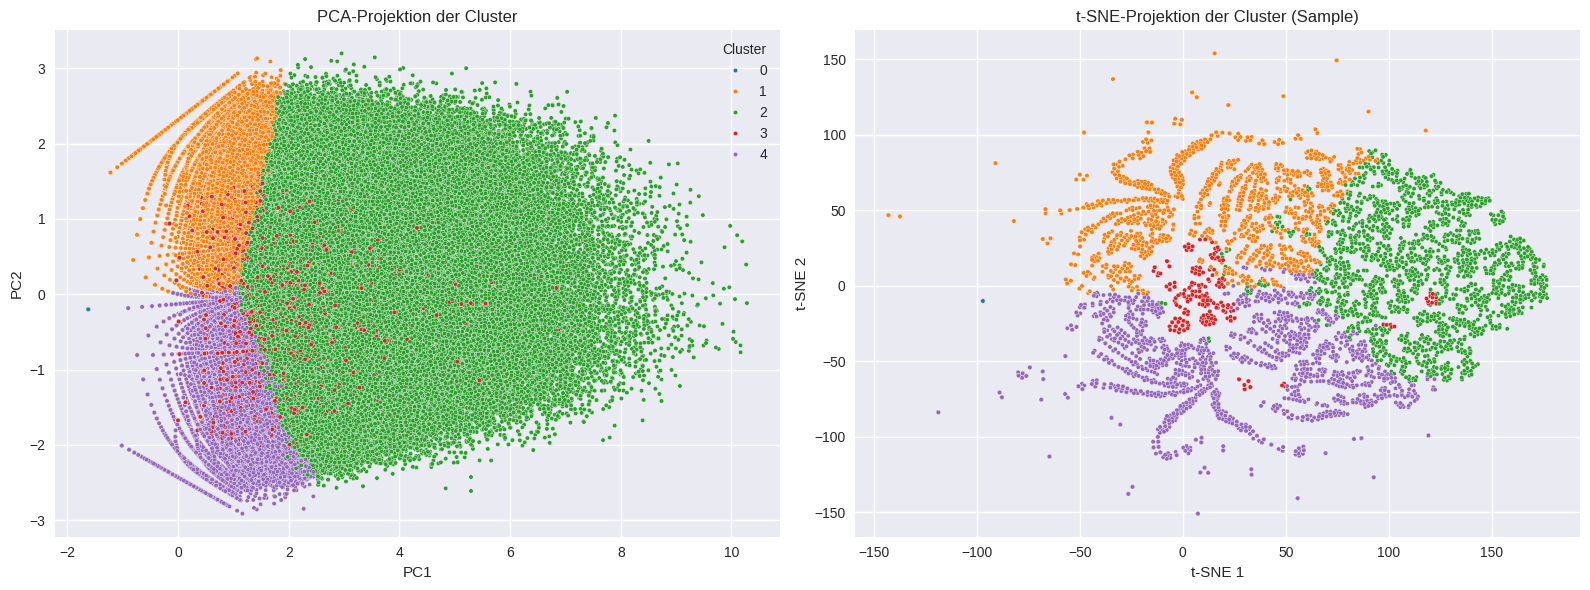

In [41]:
# ==== k-Means mit k=5 ====
k_optimal = 5
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# ==== PCA (komplett) ====
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# ==== t-SNE (auf 10.000er Stichprobe) ====
np.random.seed(42)
sample_idx = np.random.choice(len(X_scaled), size=10000, replace=False)
X_sample = X_scaled[sample_idx]
labels_sample = labels[sample_idx]

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_sample)

# ==== Visualisierung ====
palette = sns.color_palette("tab10", n_colors=k_optimal)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# PCA
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1],
    hue=labels,
    palette=palette,
    ax=axes[0],
    s=10,
    legend='full'
)
axes[0].set_title("PCA-Projektion der Cluster")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")
axes[0].legend(title="Cluster", loc='best')

# t-SNE
sns.scatterplot(
    x=X_tsne[:, 0], y=X_tsne[:, 1],
    hue=labels_sample,
    palette=palette,
    ax=axes[1],
    s=10,
    legend=False
)
axes[1].set_title("t-SNE-Projektion der Cluster (Sample)")
axes[1].set_xlabel("t-SNE 1")
axes[1].set_ylabel("t-SNE 2")

plt.tight_layout()
plt.show()

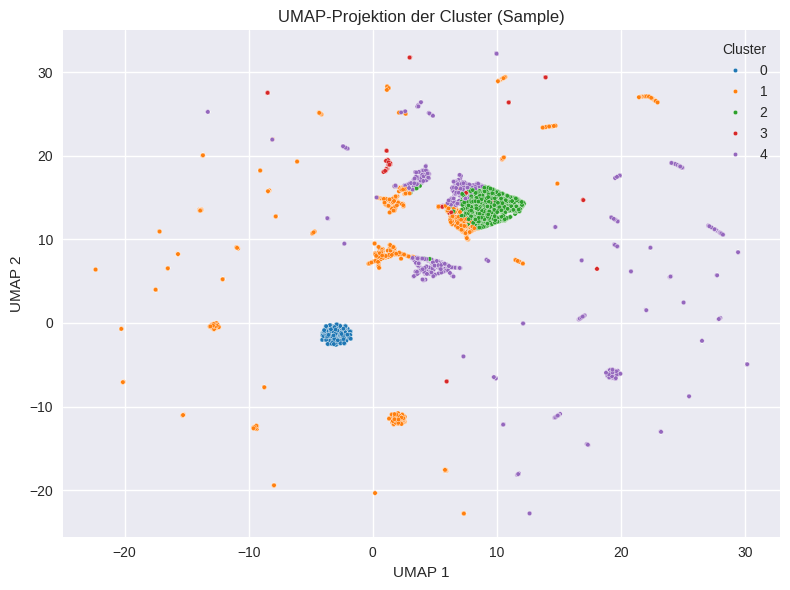

In [42]:
from umap import UMAP

# UMAP auf Stichprobe
umap = UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
X_umap_sample = umap.fit_transform(X_sample)

# Visualisierung
palette = sns.color_palette("tab10", n_colors=k_optimal)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_umap_sample[:, 0], y=X_umap_sample[:, 1],
    hue=labels_sample,
    palette=palette,
    s=10,
    legend='full'
)
plt.title("UMAP-Projektion der Cluster (Sample)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend(title="Cluster", loc='best')
plt.tight_layout()
plt.show()


Zur Visualisierung der Clusterstruktur wurden drei Methoden eingesetzt: PCA, t-SNE und UMAP.

Die PCA-Projektion dient als lineare Methode zur Dimensionsreduktion. Sie ist schnell, interpretierbar und eignet sich gut, um grobe Strukturen und Hauptachsen der Variation darzustellen.

t-SNE wurde verwendet, um die Cluster in einer nichtlinearen Weise darzustellen. t-SNE betont lokale Strukturen und kann daher enge Cluster besser voneinander abgrenzen,
eignet sich aber nur für kleinere Stichproben aufgrund seines hohen Rechenaufwands.

UMAP kombiniert Vorteile beider Methoden: Es ist ebenfalls nichtlinear, erhält aber zusätzlich globale Strukturen besser als t-SNE und ist gleichzeitig deutlich skalierbarer,
wodurch auch große Datensätze vollständig visualisiert werden können.

Alle drei Visualisierungen nutzen eine konsistente Farbpalette, sodass die Clusterzugehörigkeit vergleichbar bleibt.
So lässt sich die Qualität des Clusterings sowohl aus linearen als auch nichtlinearen Perspektiven bewerten.

UMAP wurde zusätzlich auf einer 10.000er Stichprobe durchgeführt, da die Anwendung auf den vollständigen Datensatz aufgrund von Speicherbeschränkungen nicht möglich war.

#### Aufgabe 4.2.5. – Cluster-Interpretation (4 Punkte)
Analysieren und interpretieren Sie Ihre Cluster, um umsetzbare Erkenntnisse zu gewinnen:

- Berechnen Sie die Mittelwerte der wichtigsten Merkmale für jeden Cluster und stellen Sie diese grafisch dar.
- Stellen Sie die Anteile der Nutzer, die zu jedem Cluster gehören, grafisch dar.
- Beschreiben Sie, was jeden Cluster charakterisiert (z. B. hohe/geringe Aktivität, Verhaltenspräferenzen).
- Geben Sie jedem Cluster einen aussagekräftigen Namen, der dessen Verhaltensmuster widerspiegelt

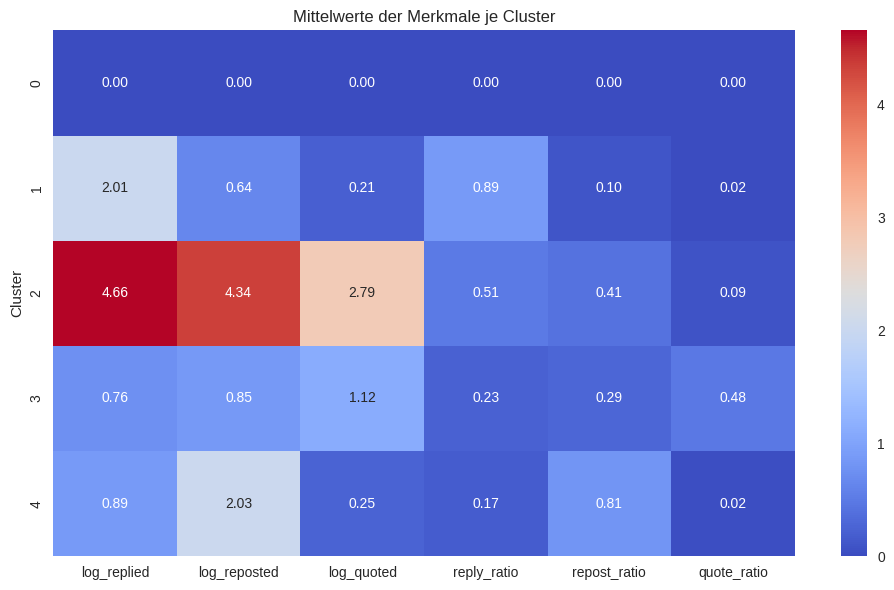

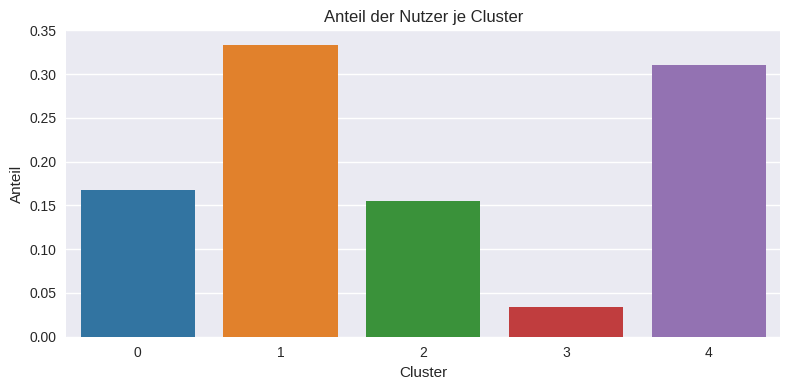

In [46]:
kmeans = KMeans(n_clusters=5, random_state=42)
merged["cluster"] = kmeans.fit_predict(X_scaled)

# 1. Mittelwerte der wichtigsten Merkmale je Cluster berechnen
cluster_means = merged.groupby("cluster")[[
    "log_replied", "log_reposted", "log_quoted",
    "reply_ratio", "repost_ratio", "quote_ratio"
]].mean()

# 2. Anteil der Nutzer je Cluster
cluster_sizes = merged["cluster"].value_counts(normalize=True).sort_index()

# 3. Visualisierung: Heatmap der Mittelwerte
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Mittelwerte der Merkmale je Cluster")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()

# Feste Farbpalette mit tab10, sortiert nach Cluster-ID
palette = sns.color_palette("tab10", n_colors=5)
cluster_colors = {i: palette[i] for i in range(5)}

# 4.Balkendiagramm mit festen Farben
plt.figure(figsize=(8, 4))
sns.barplot(
    x=cluster_sizes.index,
    y=cluster_sizes.values,
    palette=[cluster_colors[i] for i in cluster_sizes.index]
)
plt.title("Anteil der Nutzer je Cluster")
plt.xlabel("Cluster")
plt.ylabel("Anteil")
plt.tight_layout()
plt.show()

Die Nutzer wurden anhand ihres Interaktionsverhaltens in fünf Cluster gruppiert. Cluster 0 enthält vollständig inaktive Nutzer ohne jede Interaktion.
Cluster 1 umfasst eher passive Nutzer, die gelegentlich auf Beiträge antworten.
Cluster 2 zeigt die höchste Aktivität über alle Interaktionsformen hinweg – das sind sehr aktive und vielseitige Nutzer.
In Cluster 3 dominieren Zitate als bevorzugte Interaktionsform, was auf kommentierende oder reflektierende Accounts hindeutet.
Cluster 4 schließlich besteht aus Nutzern, die überwiegend Inhalte weiterverbreiten und fast ausschließlich reposts nutzen.

Die meisten Nutzer finden sich in Cluster 1 (ca. 33 %) und Cluster 4 (ca. 31 %). Besonders aktiv, aber zahlenmäßig kleiner ist Cluster 2.
Cluster 3 ist sehr spezifisch und klein, während Cluster 0 keinerlei Aktivität zeigt